In [13]:
from pathlib import Path

project_dir = Path('.').absolute().parent
project_dir

PosixPath('/home/daniel/Documents/github/mcx-lab/rl-baselines3-zoo')

In [14]:
import gym 
import utils.import_envs

env = gym.make("A1GymEnv-v0")
foot_names = env.robot.GetFootNames()

Init CPG gait=walk, duty_factor=0.75, period=0.6666666666666666
argv[0]=


# Inspect logged inputs / outputs

Logs generated with `scripts/enjoy_with_logging.py`

In [15]:
import numpy as np
import pickle 
import json

def load_robot_states(stats_dir):
    base_position = np.load(stats_dir / 'base_pos.npy')
    base_velocity = np.load(stats_dir / 'base_vel.npy')
    motor_position = np.load(stats_dir / 'motor_position.npy')
    motor_velocity = np.load(stats_dir / 'motor_velocity.npy')
    ref_displacement = np.load(stats_dir / 'reference_displacement.npy')
    act_displacement = np.load(stats_dir / 'actual_displacement.npy')
    ref_foot_contacts = np.load(stats_dir / 'reference_foot_contact.npy')
    act_foot_contacts = np.load(stats_dir / 'actual_foot_contact.npy')
    nn_observations = np.load(stats_dir / 'nn_observations.npy')

    reward_component_values = np.load(stats_dir / 'reward_components.npy')
    with open(stats_dir / 'reward_component_names.json', 'r') as file:
        reward_component_names = json.load(file)
    print(nn_observations.shape)
    nn_actions = np.load(stats_dir / 'nn_actions.npy')
    time = np.load(stats_dir / 'time.npy')
    
    return {
        'time': time, 
        'base_pos': base_position,
        'base_vel': base_velocity,
        'motor_pos': motor_position, 
        'motor_vel': motor_velocity, 
        'ref_displacement': ref_displacement,
        'act_displacement': act_displacement,
        'ref_foot_contacts': ref_foot_contacts, 
        'act_foot_contacts': act_foot_contacts, 
        'nn_obs': nn_observations,
        'nn_act': nn_actions,
        'reward_component_values': reward_component_values,
        'reward_component_names': reward_component_names
    }

def load_normalizer(model_dir):
    with open(model_dir / 'A1GymEnv-v0' / 'vecnormalize.pkl', 'rb') as file:
        normalizer = pickle.load(file)
    return normalizer

In [16]:
model_dir = project_dir / 'logs' / 'ppo' / 'A1GymEnv-v0_46'

import itertools

ALL_GAIT_NAMES = ("walk", "trot", "canter", "pace")
DEFAULT_GAIT_FREQUENCY = (1.5,)
ALL_GAIT_FREQUENCIES = (1.1, 1.3, 1.5, 1.7, 1.9)
DEFAULT_DUTY_FACTOR = (0.75,)
ALL_DUTY_FACTORS = (0.55, 0.65, 0.75, 0.85)

settings = itertools.chain(
    # itertools.product(DEFAULT_GAIT_FREQUENCY, ALL_DUTY_FACTORS),
    itertools.product(ALL_GAIT_NAMES, ALL_GAIT_FREQUENCIES, DEFAULT_DUTY_FACTOR)
)


stats_dirs = [
    # model_dir / 'stats'
    model_dir / f'{gait_name}-gf{gait_freq}-df{duty}' for (gait_name, gait_freq, duty) in settings
    # model_dir / 'test_var_duty' / f'duty_{duty}' \
    #     for duty in (0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85)
]
# stats_dir1 = model_dir / 'experiments' / 'vary_freq' / 'train_1.0Hz_test_1.0Hz_alpha_10.0'
# stats_dir2 = model_dir / 'experiments' / 'vary_freq' / 'train_1.0Hz_test_2.0Hz'

statss = [load_robot_states(sd) for sd in stats_dirs]
normalizer = load_normalizer(model_dir)

(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)
(1000, 1, 73)


# Plot Reference / Actual Foot Contacts

[11.  11.5 11.5 11.5]
[13.  13.5 13.5 13.5]
[15.  15.5 15.5 15.5]


[17.  17.5 17.5 17.5]


[19.5 19.5 20.  19.5]


[11.  11.5 11.5 11. ]
[13.  13.5 13.5 13. ]
[15.  15.5 15.5 15. ]


[17.5 17.5 17.5 17.5]


/tmp/ipykernel_40933/1720276820.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[19.5 19.5 19.5 19.5]
[11.5 11.5 11.5 11.5]
[13.  13.5 13.5 13.5]


[15.5 15.5 15.5 15.5]
[17.5 17.5 17.5 17.5]


[19.5 19.5 19.5 19.5]


[11.  11.5 11.  11.5]
[13.  13.5 13.  13.5]
[15.  15.5 15.  15.5]


[17.5 17.5 17.5 17.5]


[19.5 19.5 19.5 19.5]


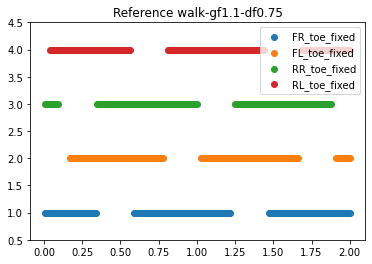

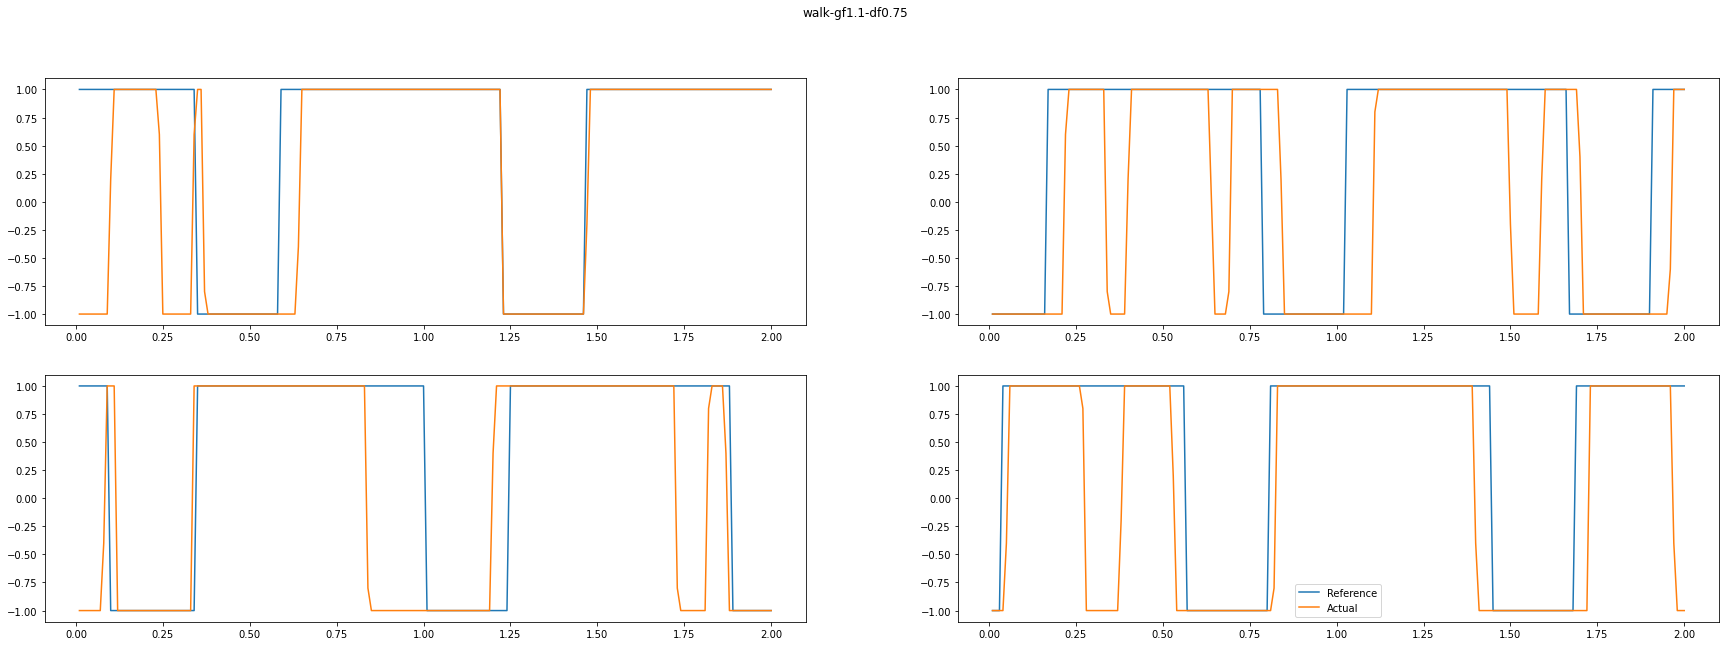

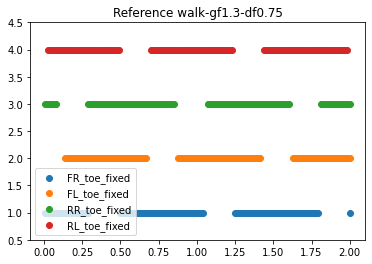

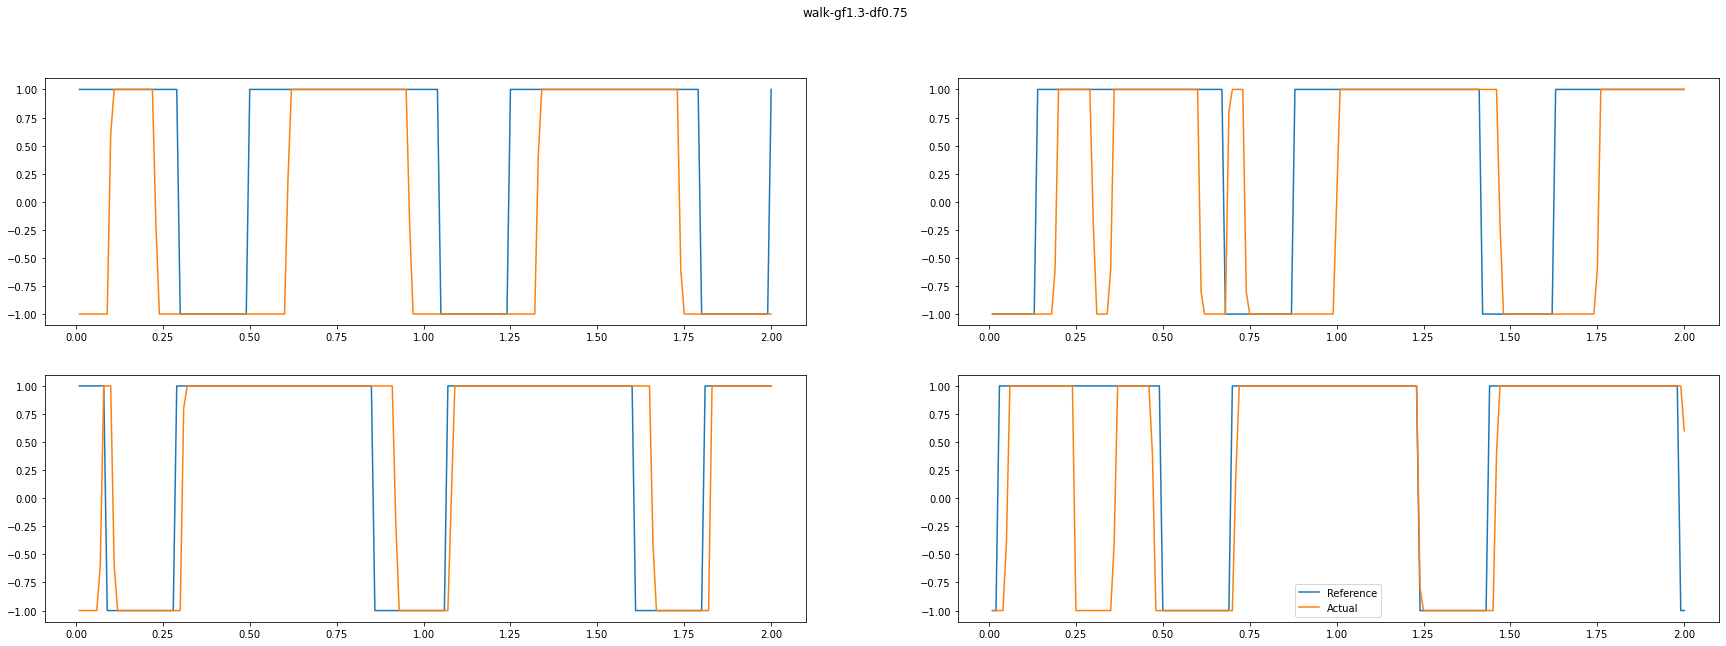

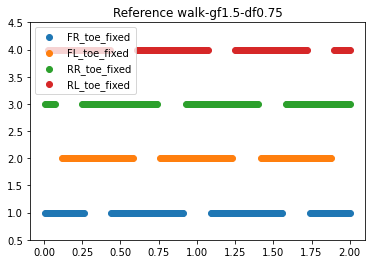

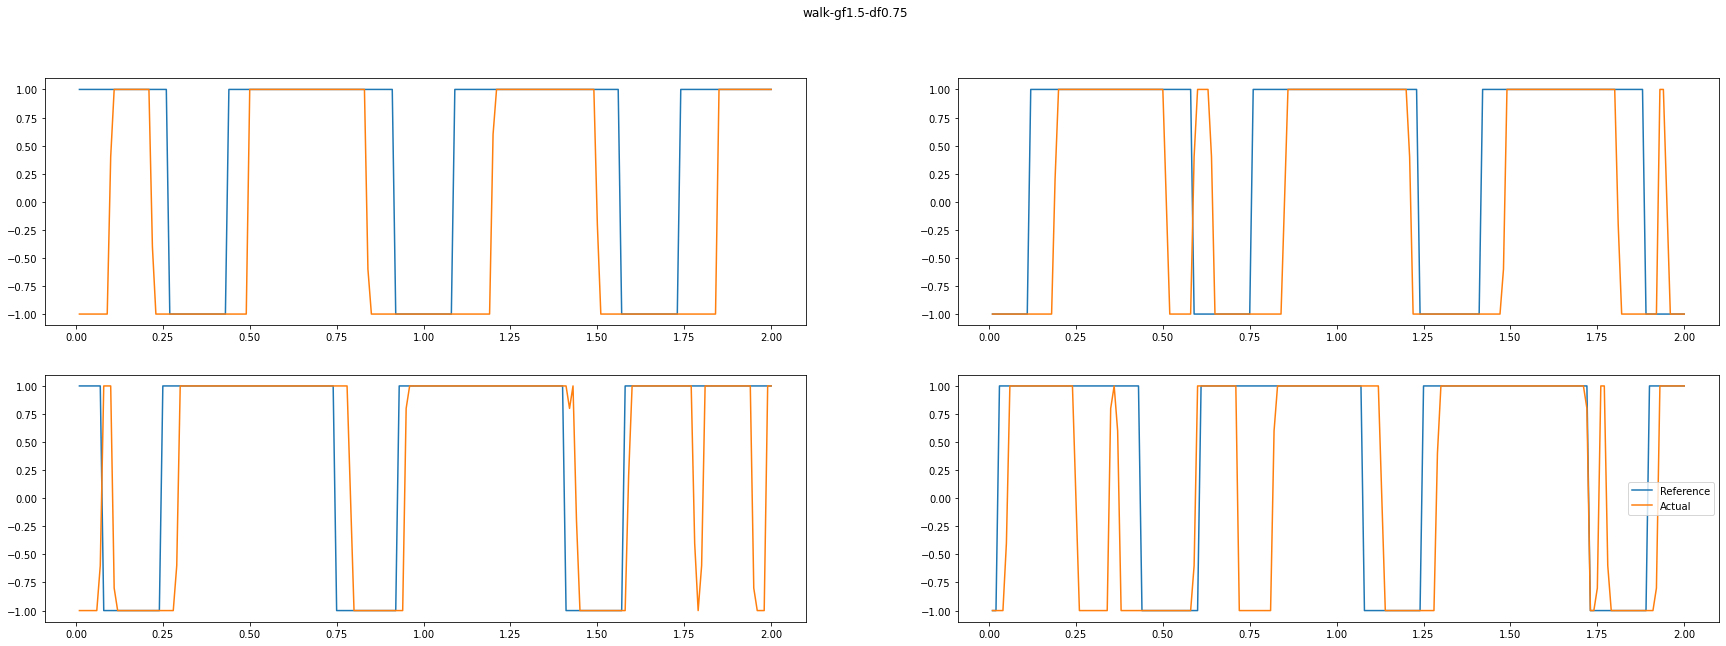

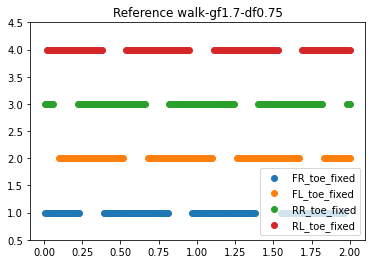

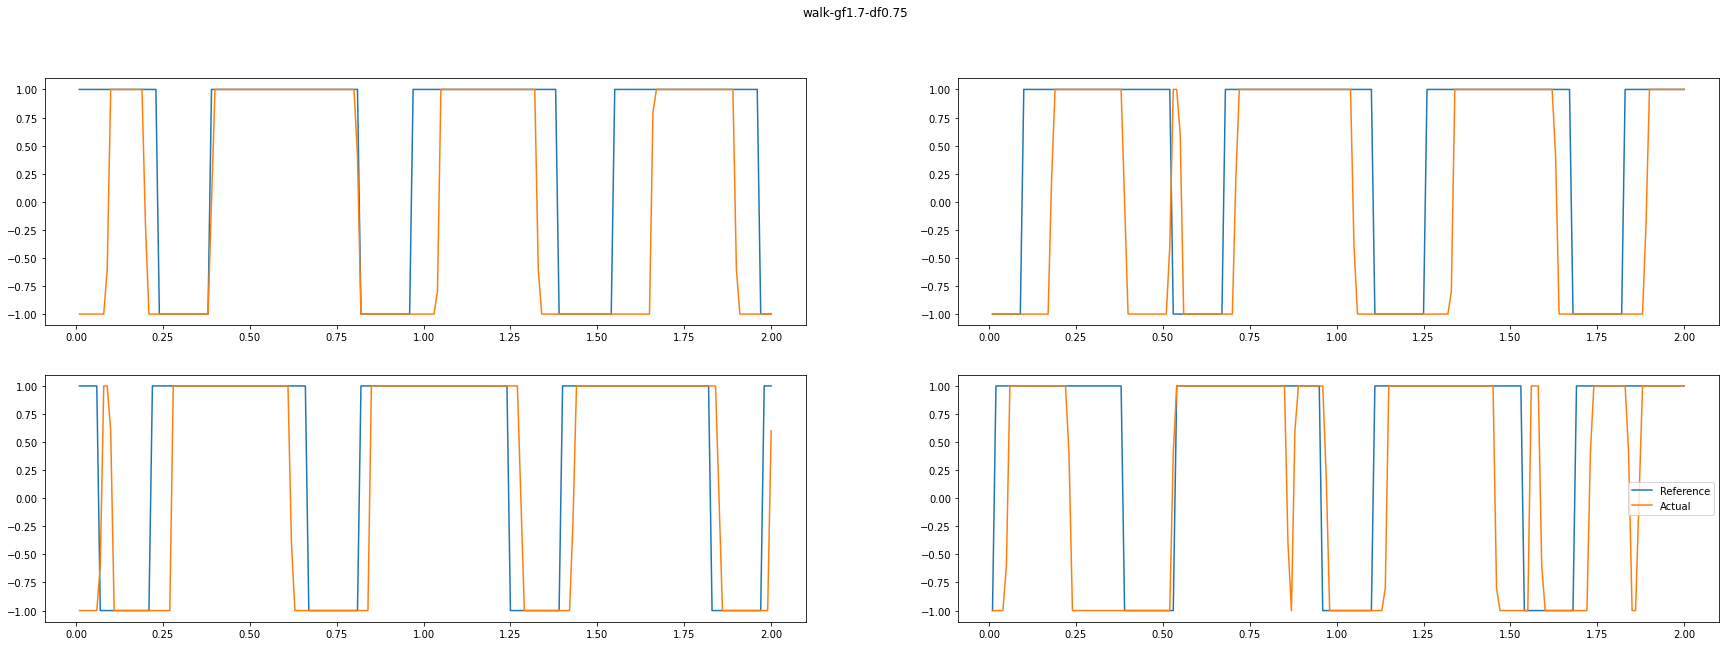

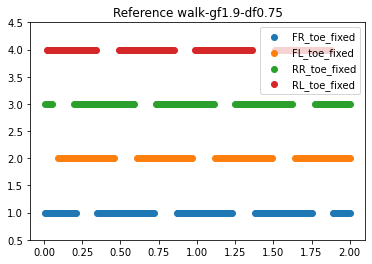

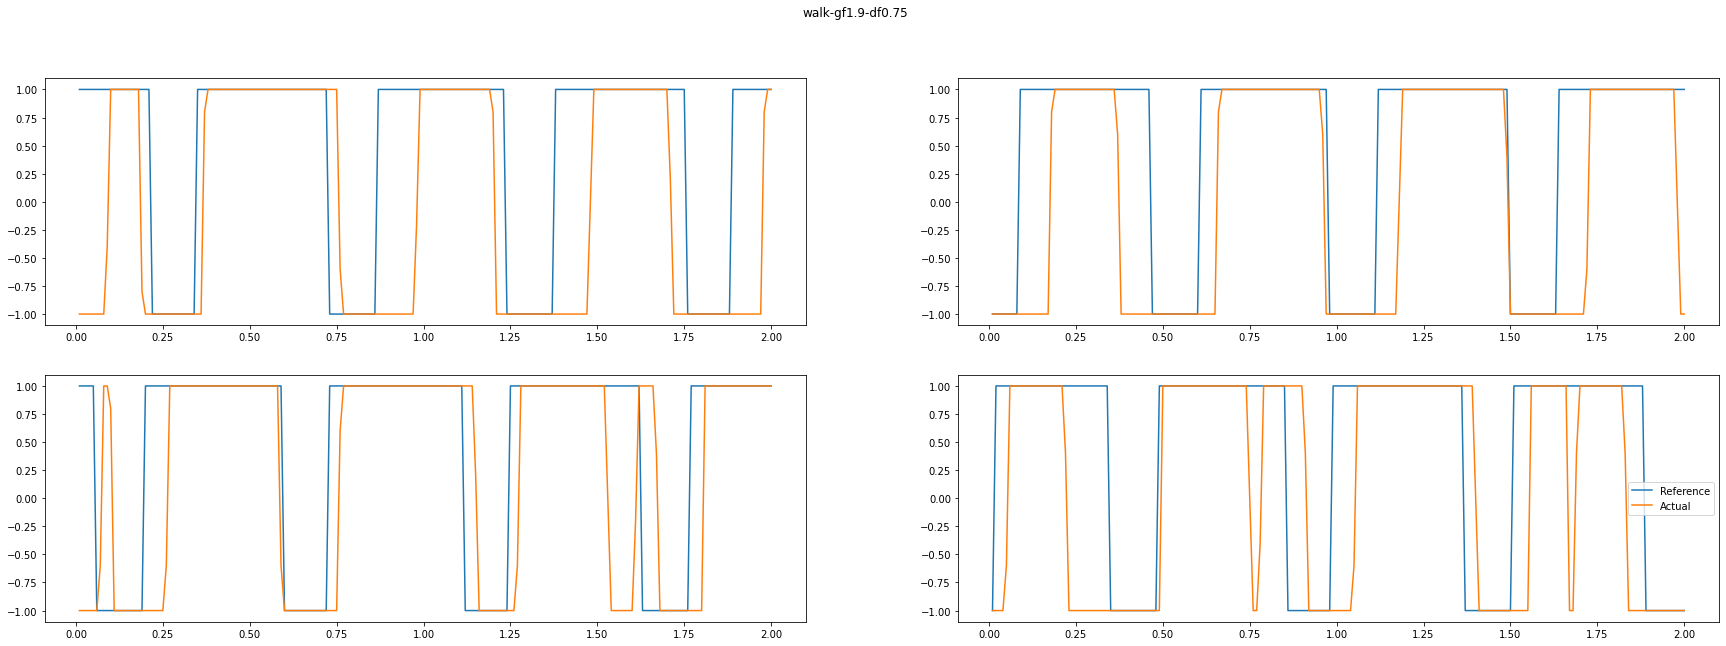

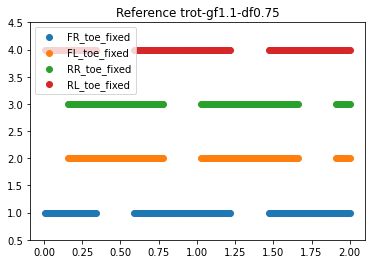

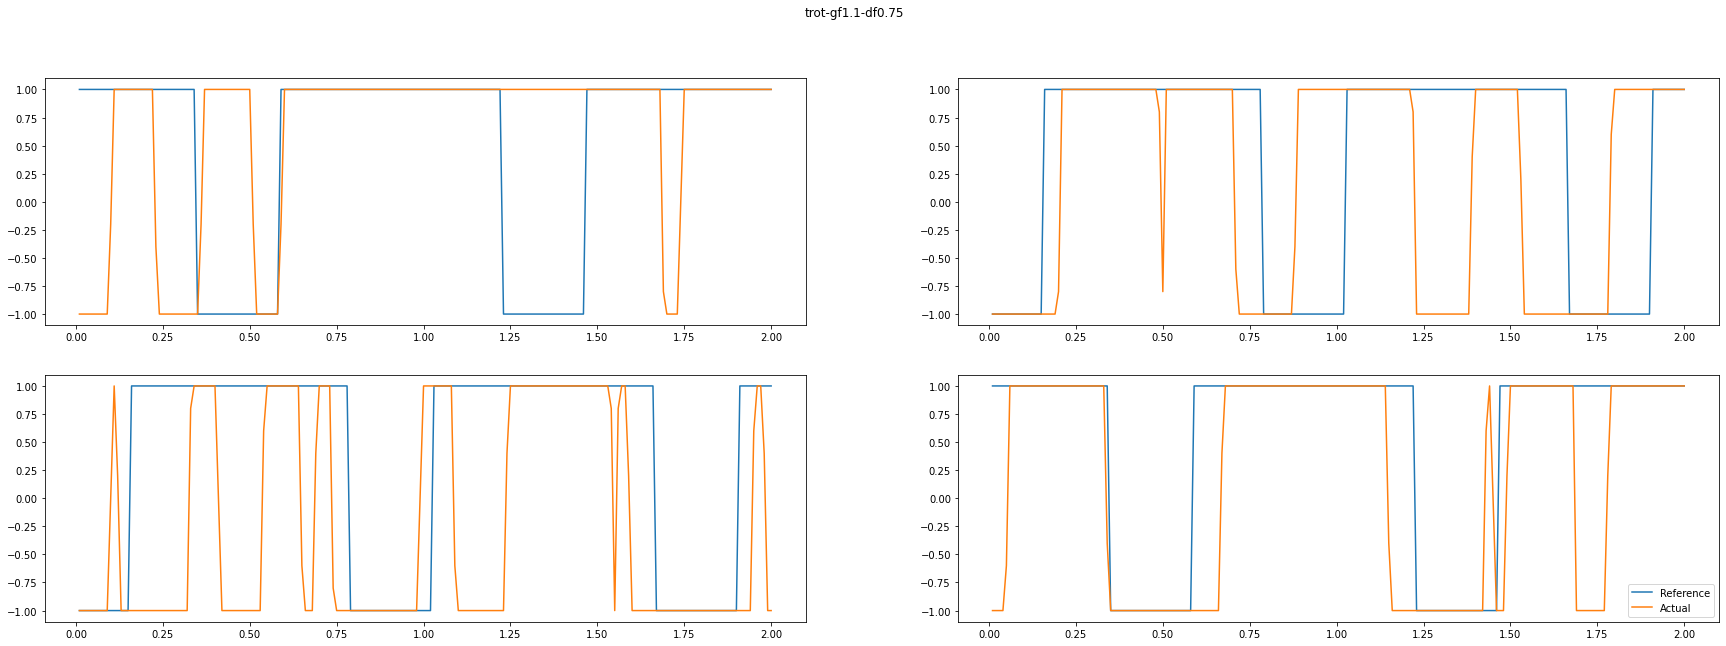

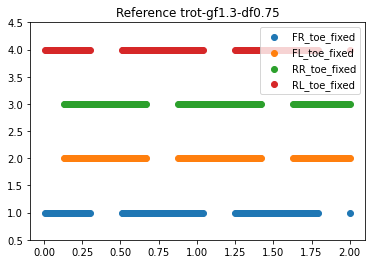

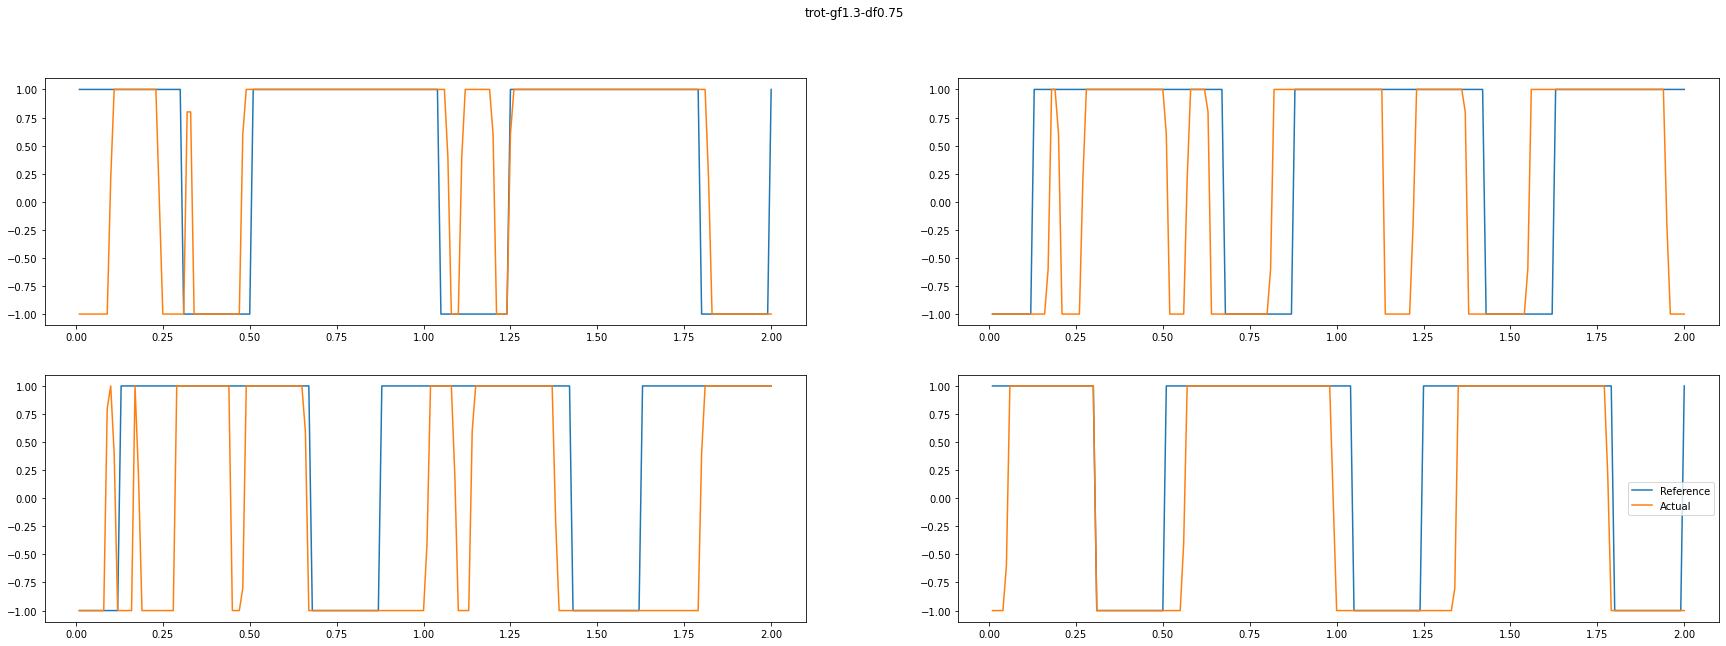

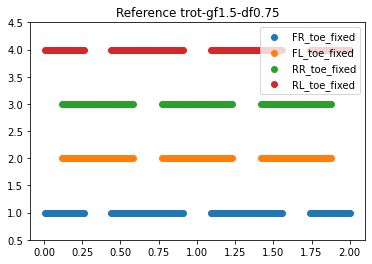

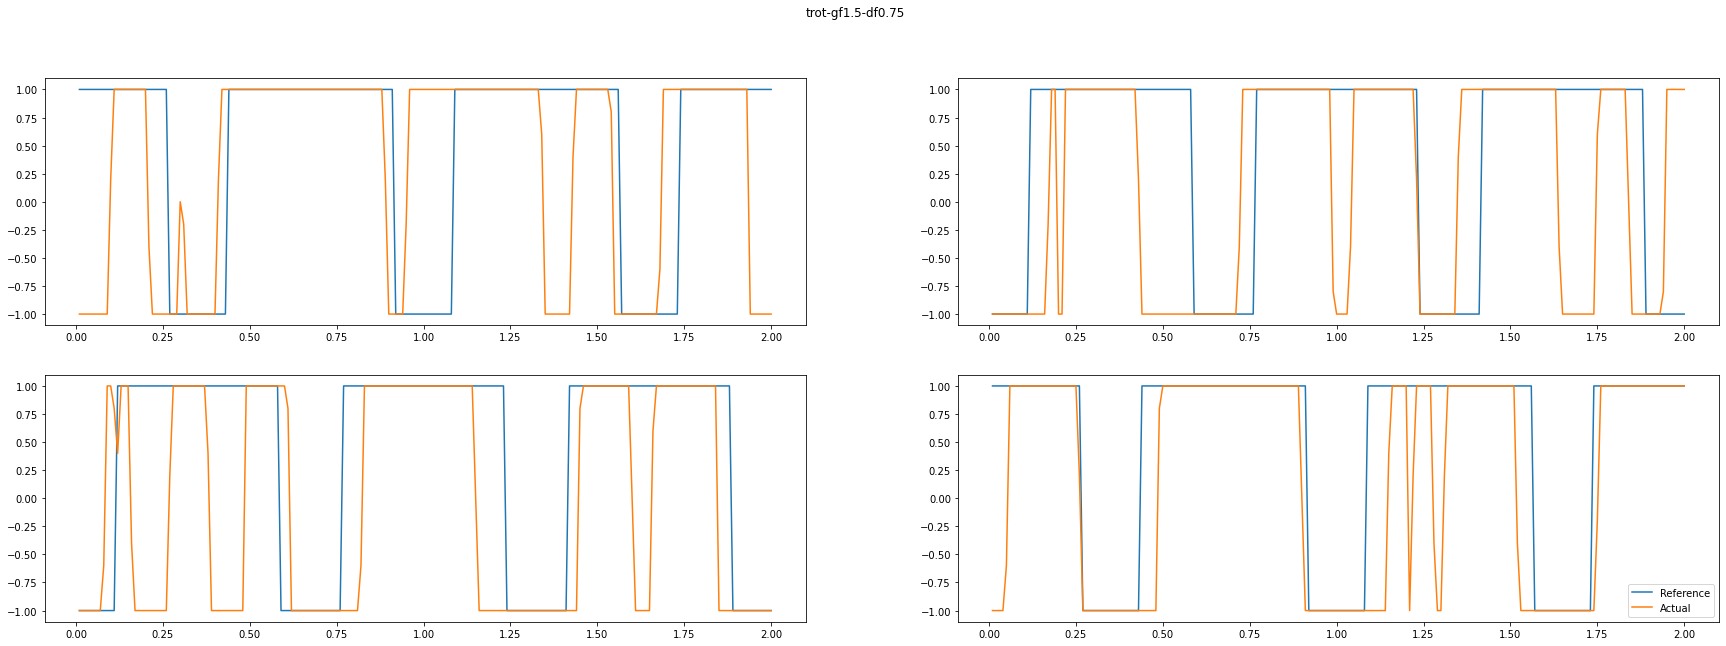

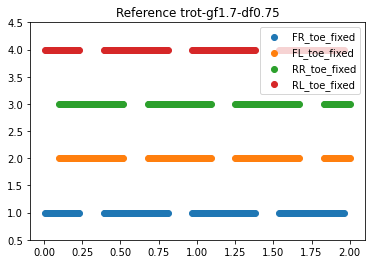

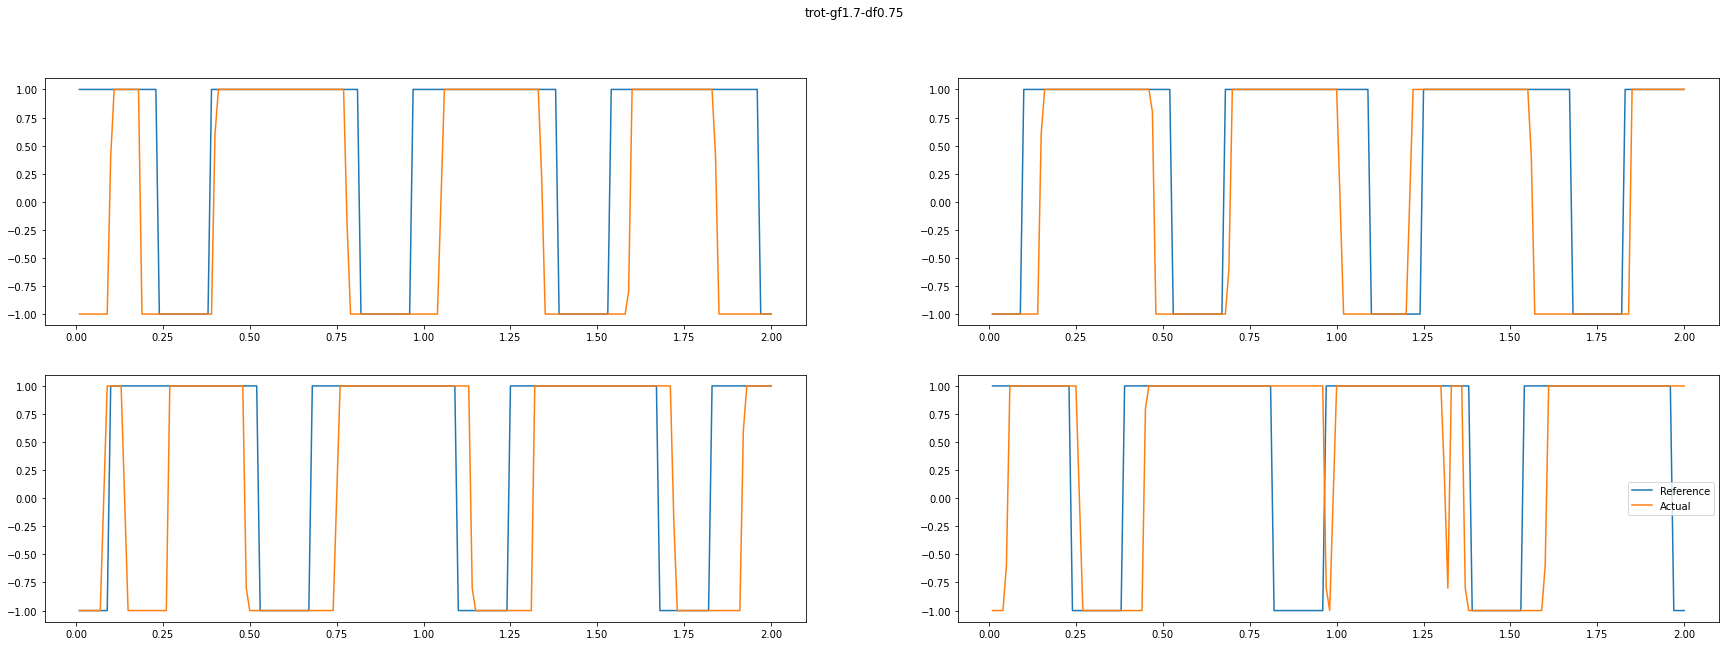

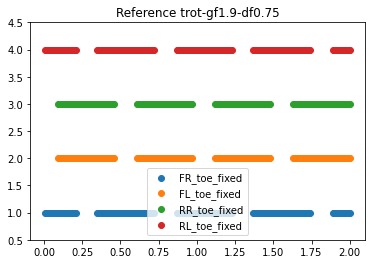

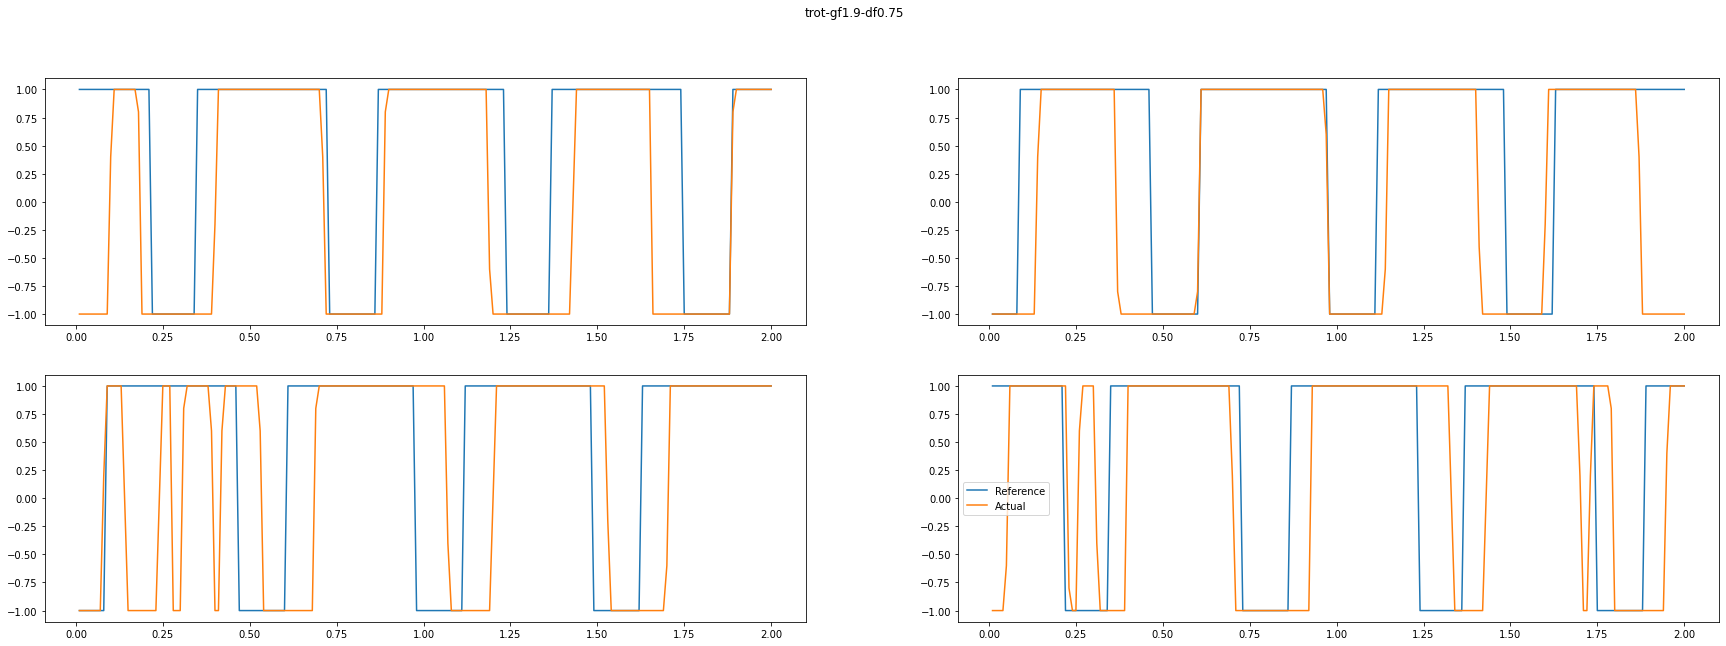

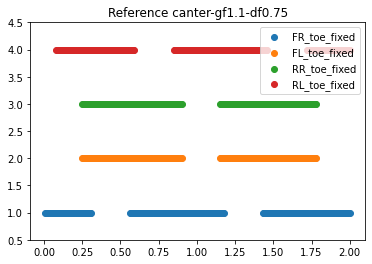

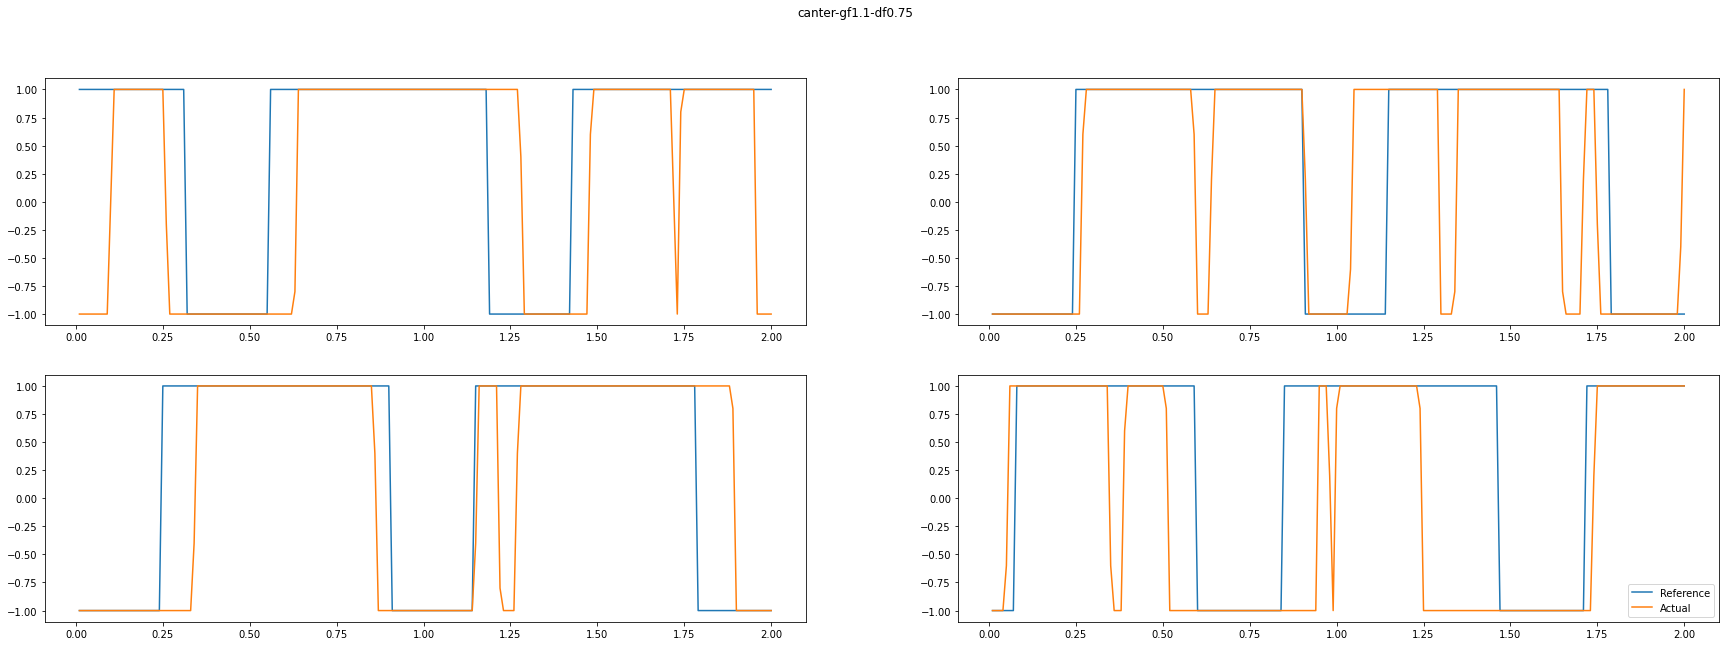

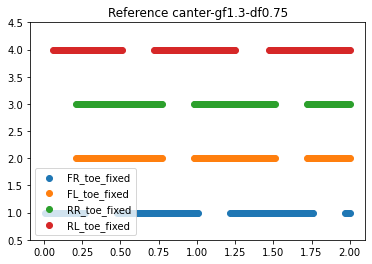

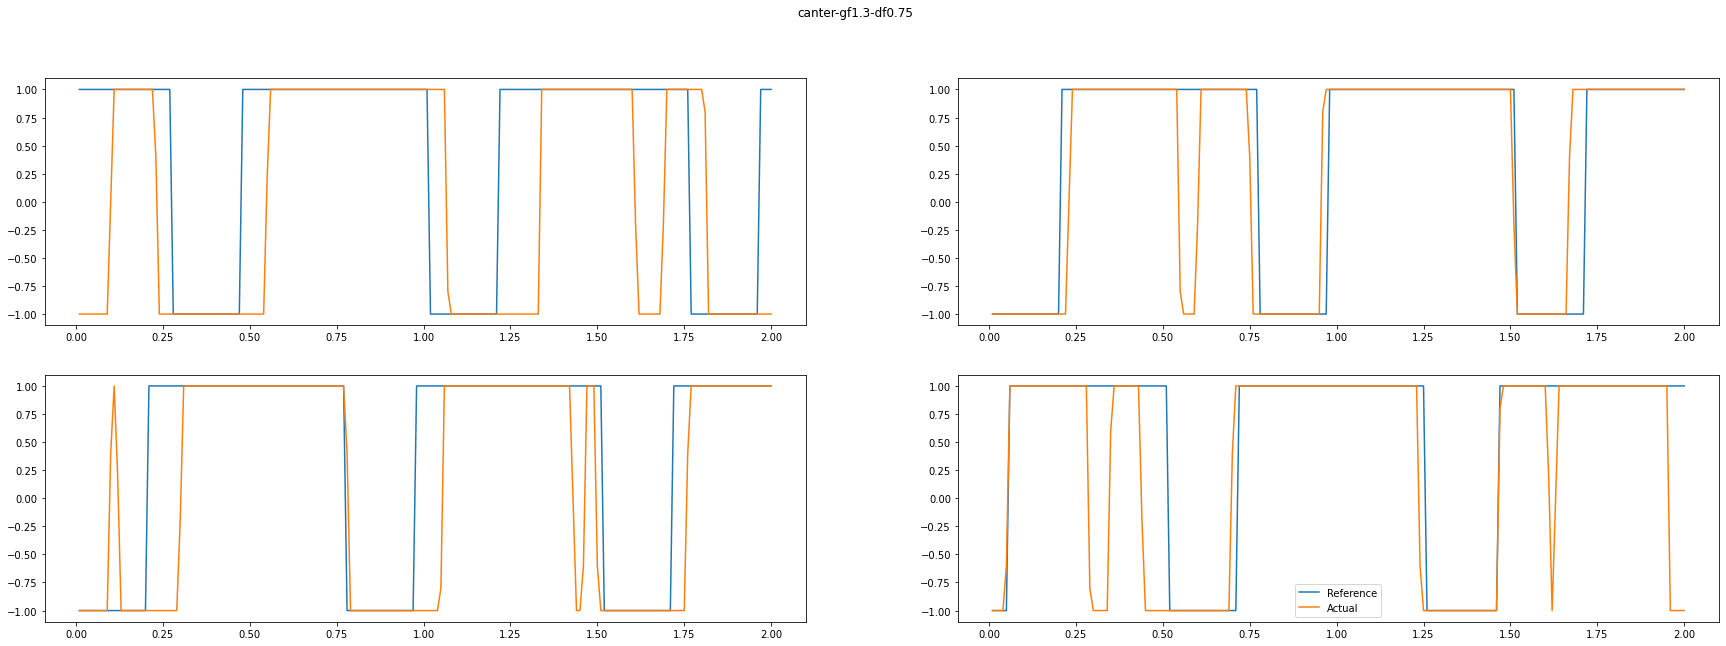

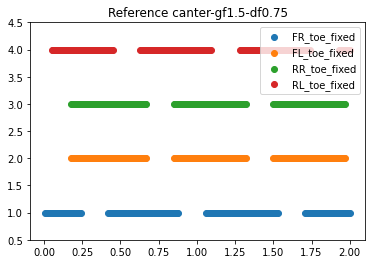

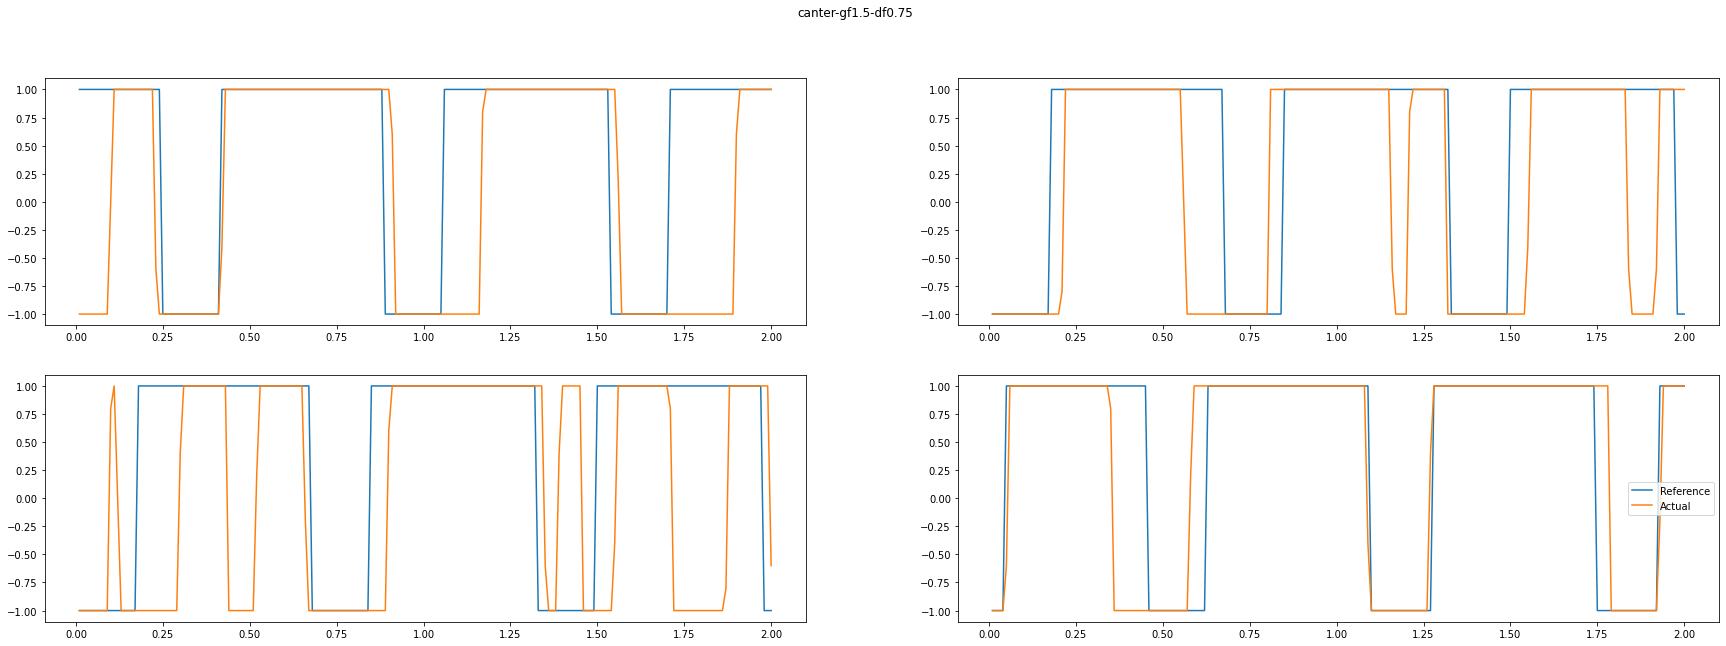

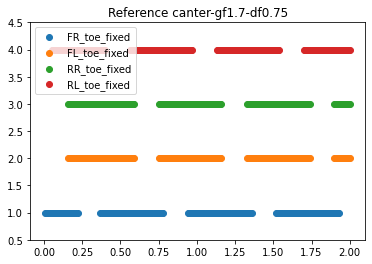

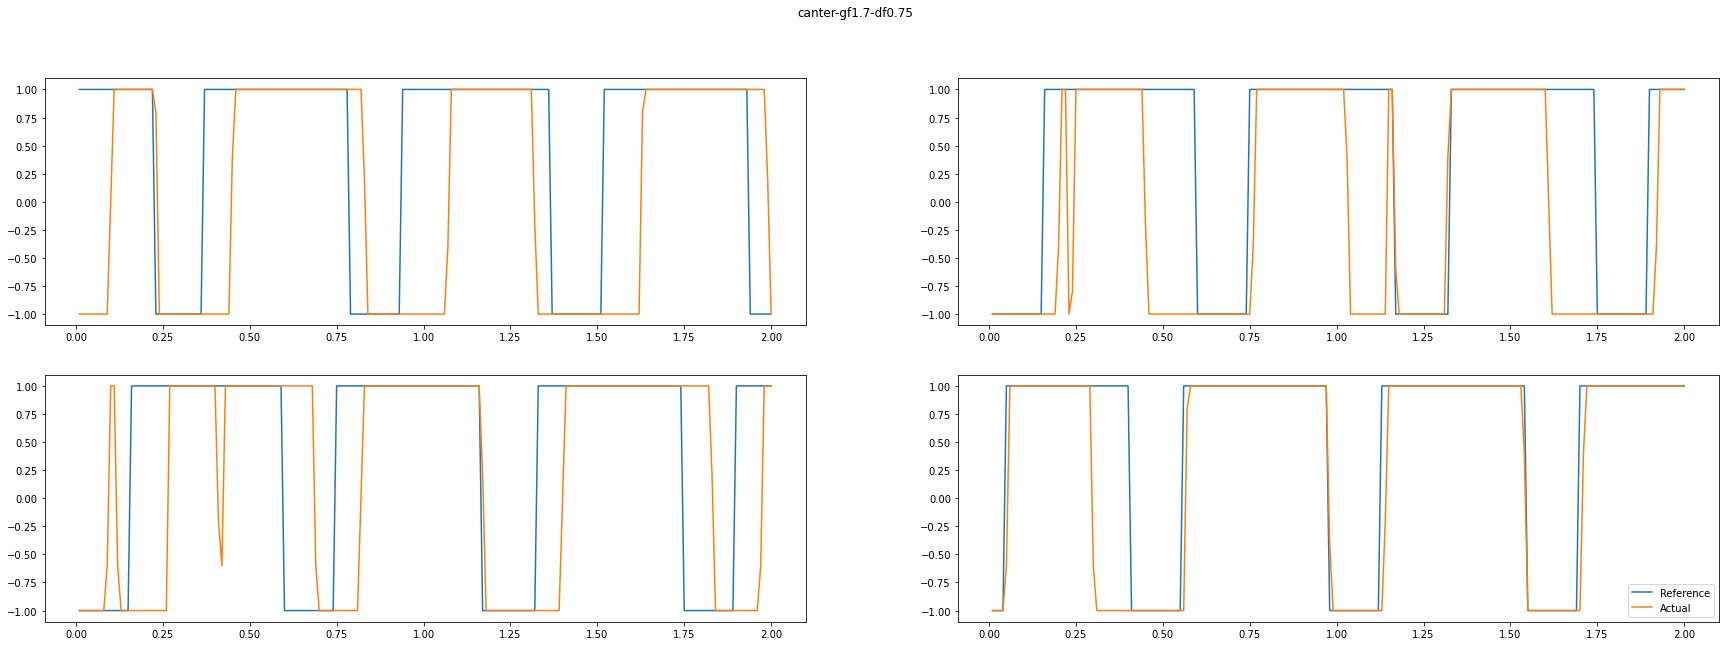

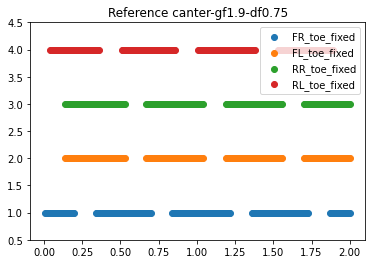

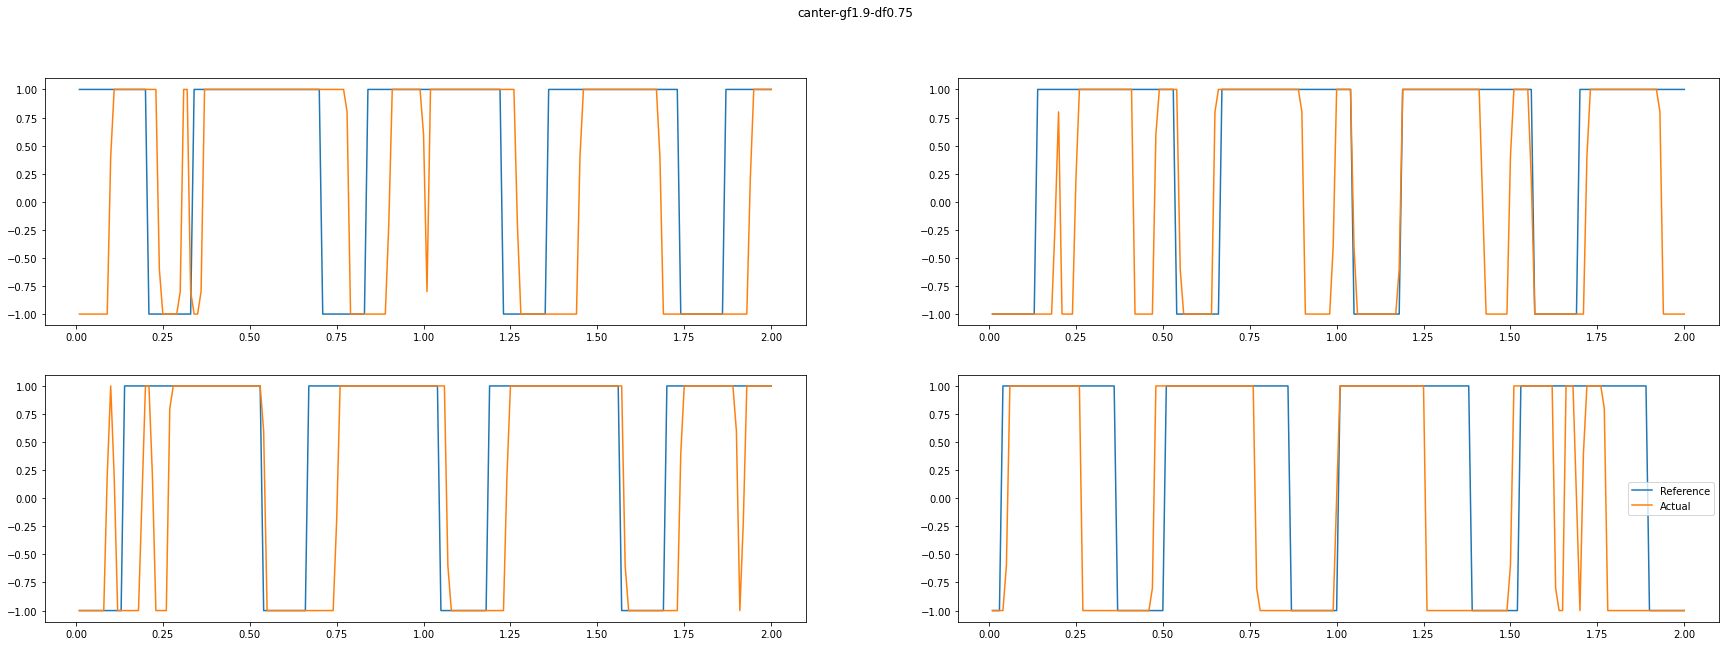

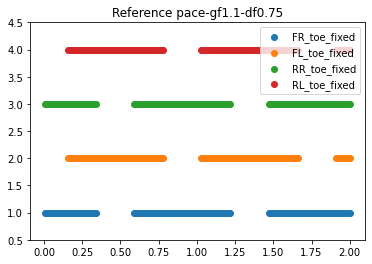

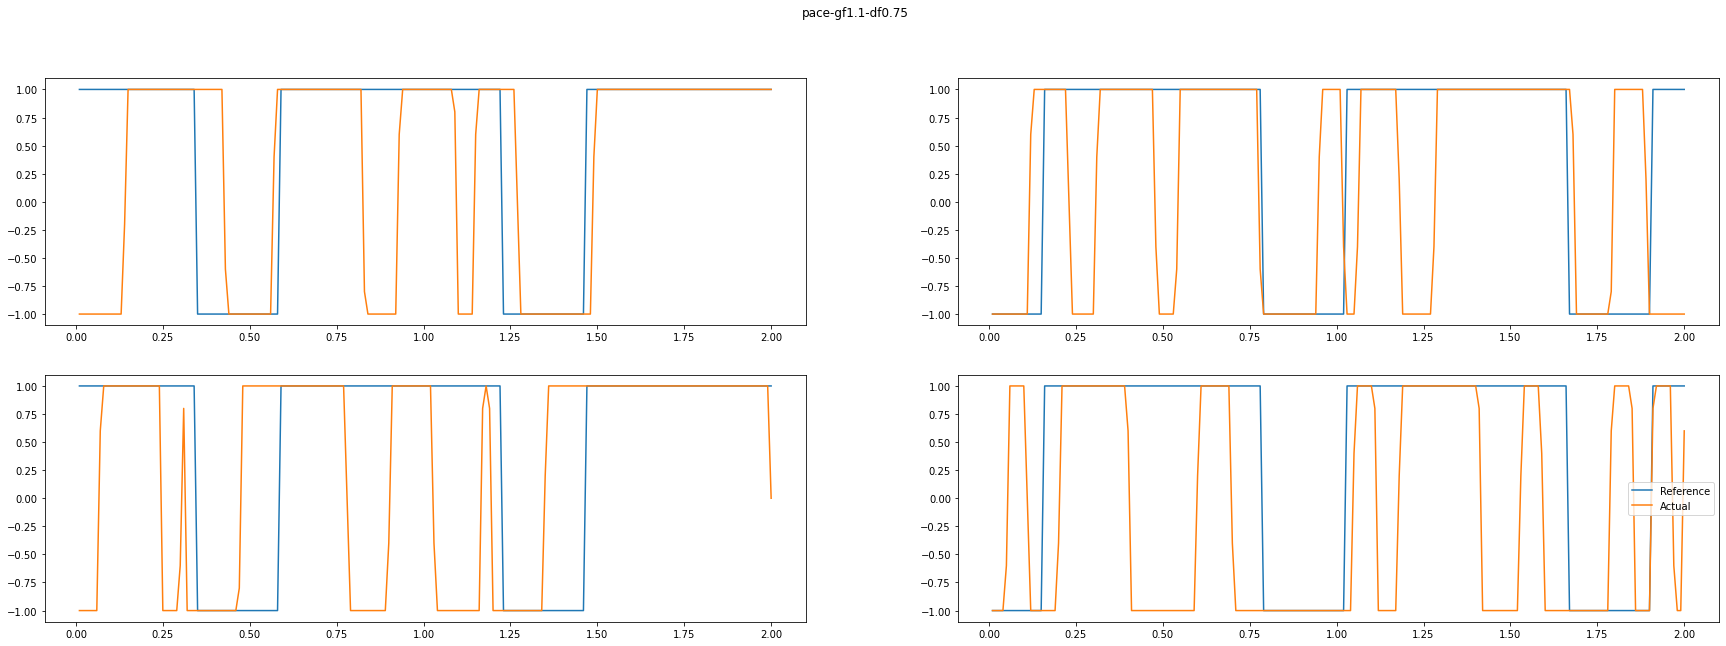

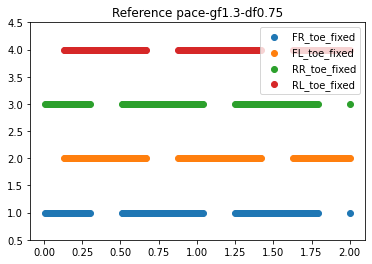

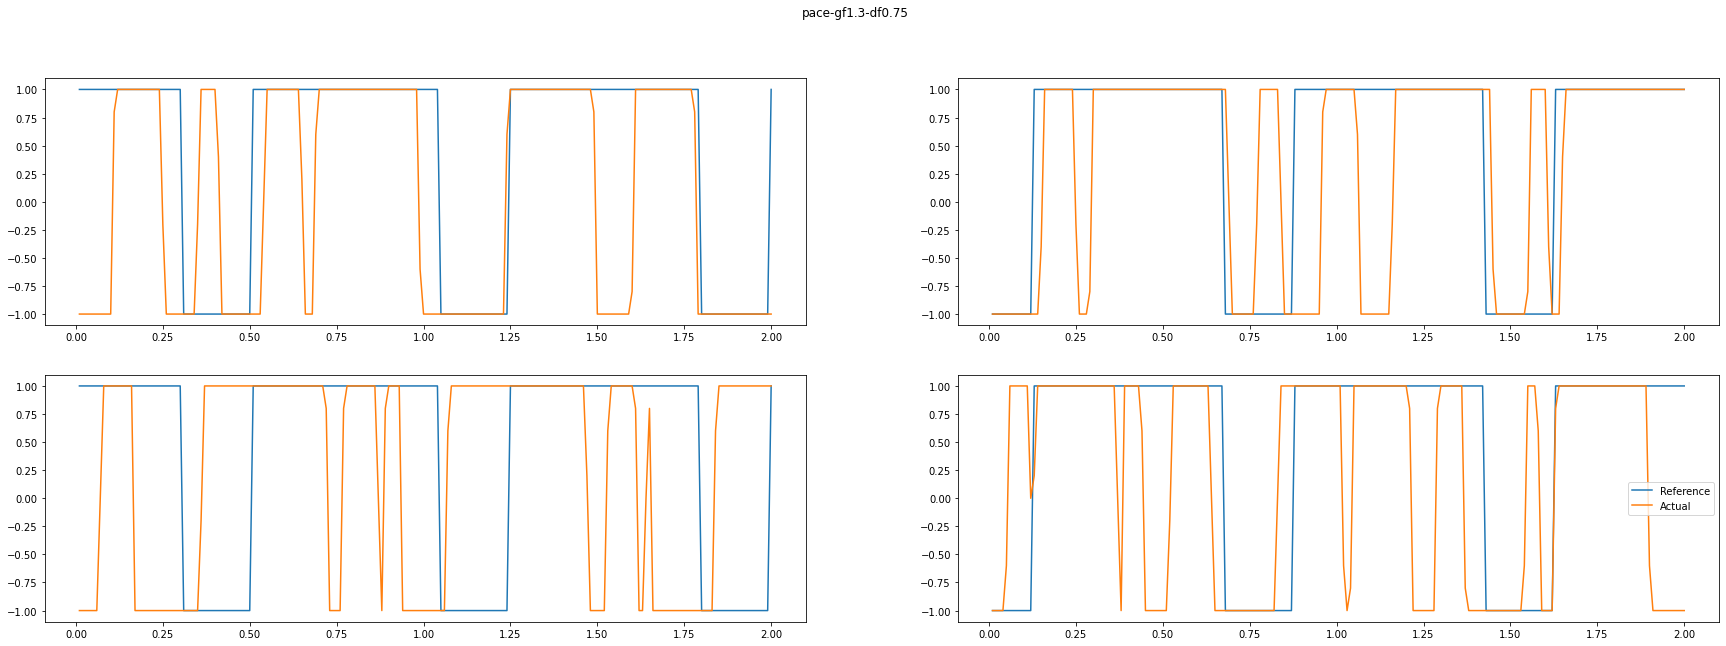

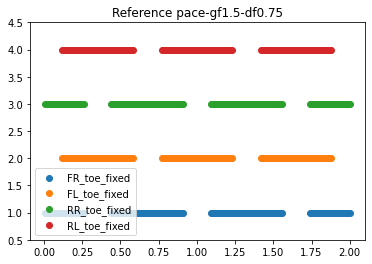

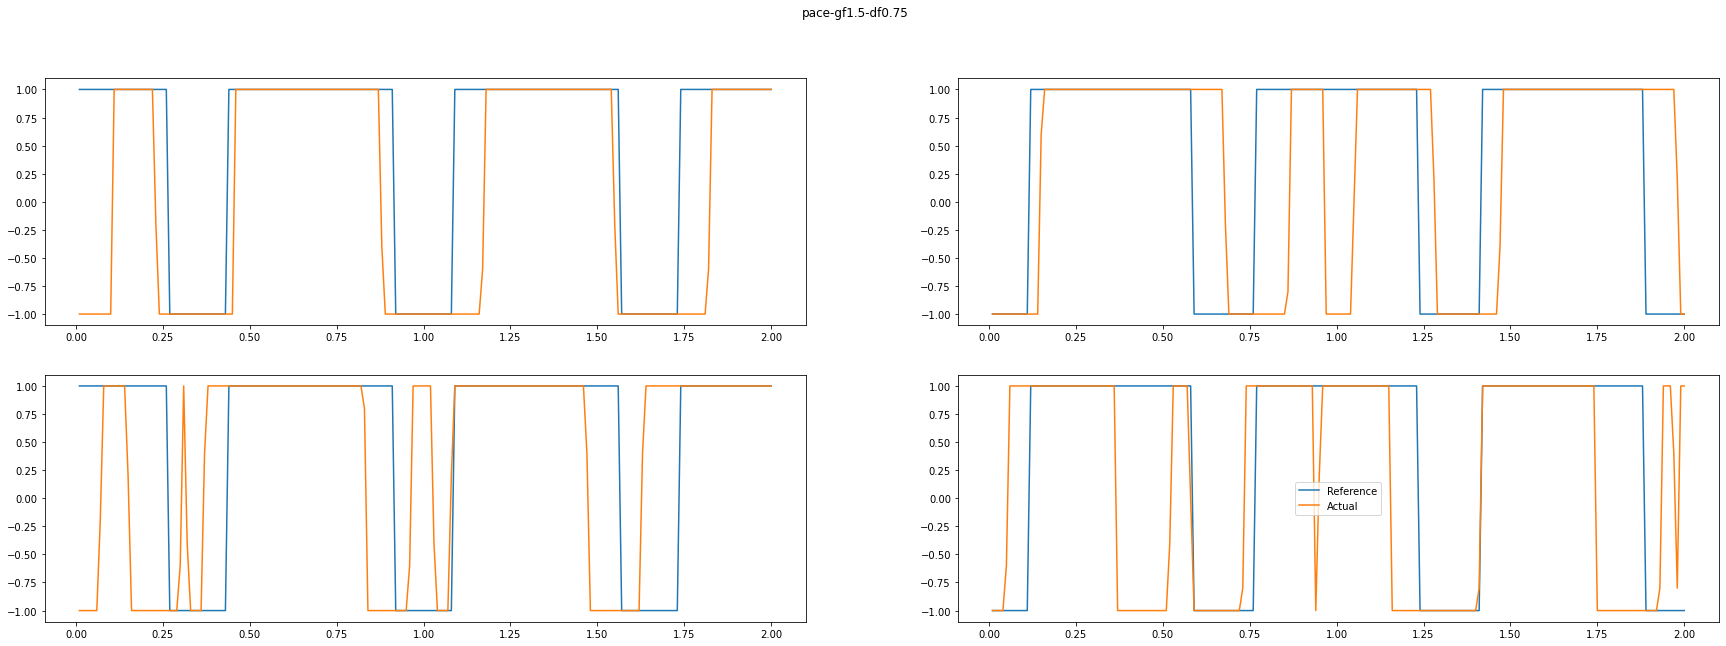

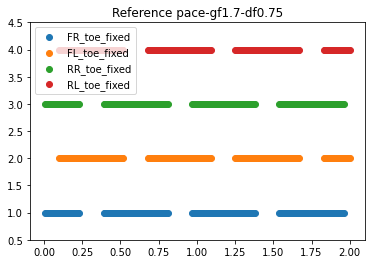

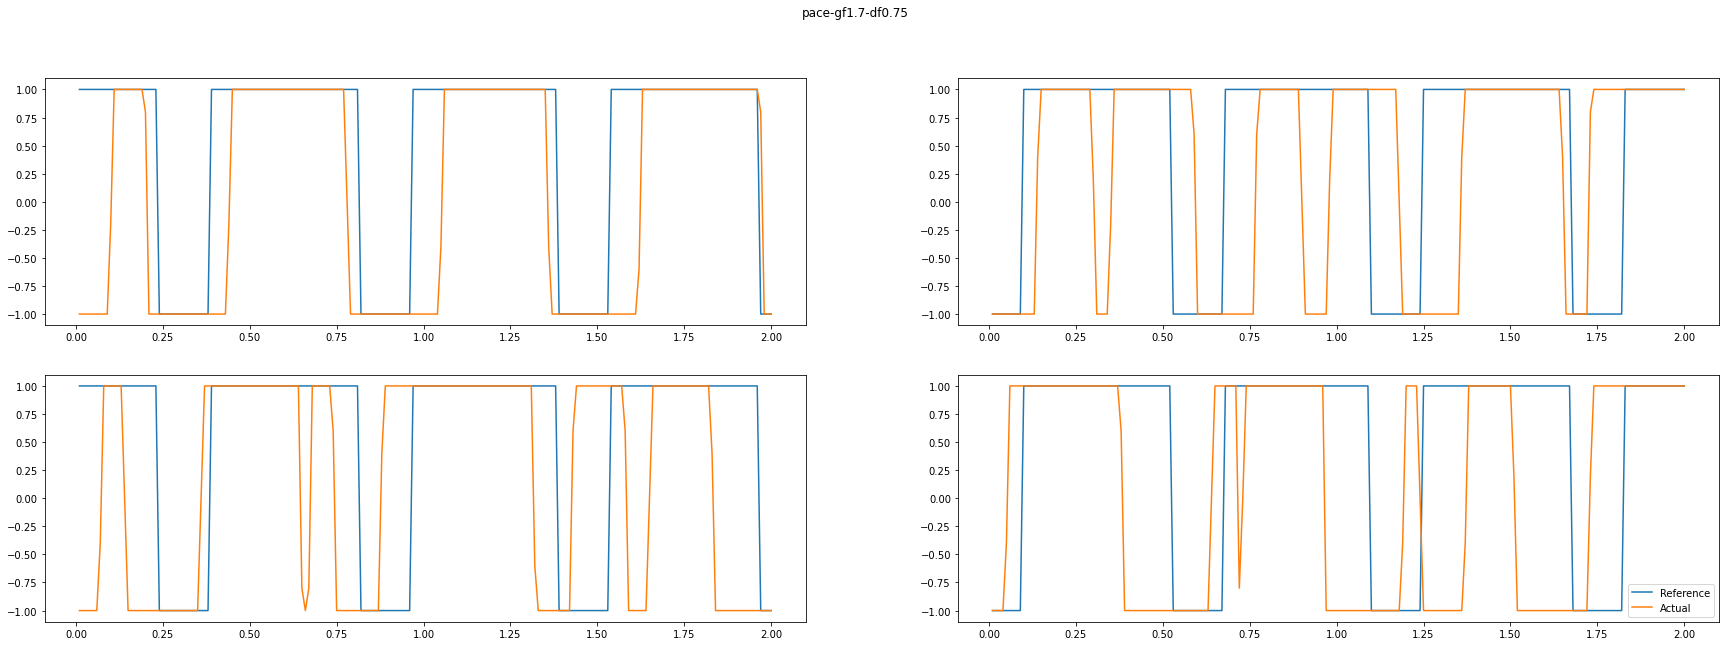

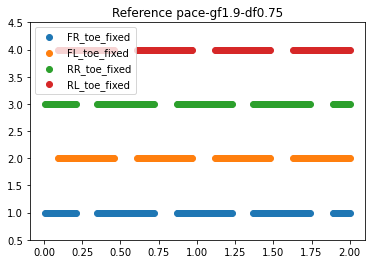

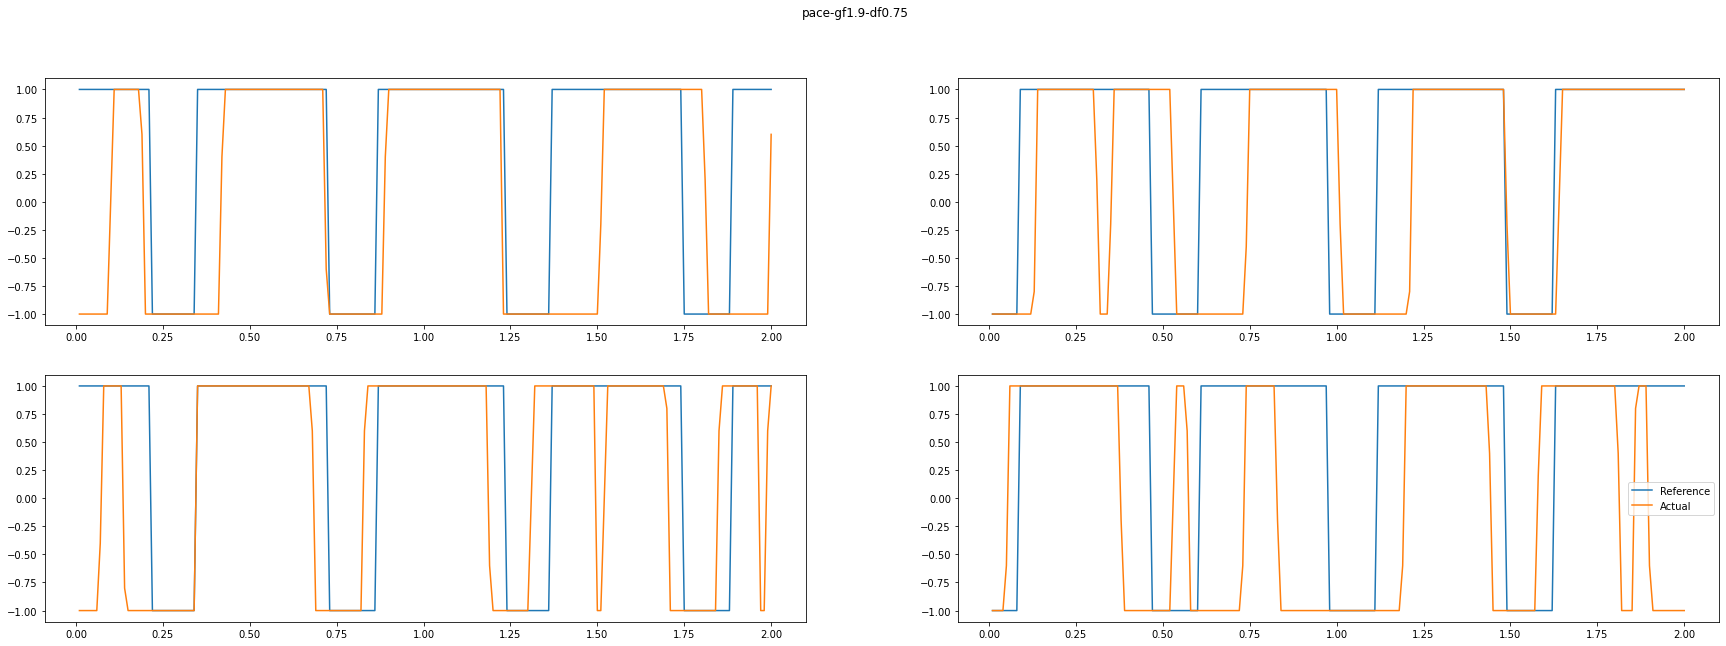

In [17]:
NUM_TIMESTEPS = 200

def plot_foot_contact_sequence(stats, stats_dir):
    import matplotlib.pyplot as plt 
    
    time = stats['time']
    ref_foot_contacts = stats['ref_foot_contacts']
    act_foot_contacts = stats['act_foot_contacts']
    # Every cycle will result in an overall +4 to the absolute difference of consec. terms
    num_cycles = np.sum(np.abs(ref_foot_contacts[:-1] - ref_foot_contacts[1:]), axis=0) / 4
    print(num_cycles)
    
    plt.figure()
    plt.title(f"Reference {stats_dir.name}")
    plt.ylim(0.5, 4.5)
    for i in range(4):    
        plt.scatter(time[:NUM_TIMESTEPS], ref_foot_contacts[:NUM_TIMESTEPS, i] * (i+1), label = foot_names[i])
    plt.legend()

    
    fig, ax = plt.subplots(2,2, figsize=(30,10))
    fig.suptitle(stats_dir.name)
    idxes = [(0,0), (0,1), (1,0), (1,1)]
    for i in range(4):
        # ax[idxes[i]].set_title(f"{foot_names[i]}")
        ax[idxes[i]].plot(time[:NUM_TIMESTEPS], ref_foot_contacts[:NUM_TIMESTEPS, i], label = 'Reference')
        ax[idxes[i]].plot(time[:NUM_TIMESTEPS], act_foot_contacts[:NUM_TIMESTEPS, i], label = 'Actual')
        plt.legend()

for stats, stats_dir in zip(statss, stats_dirs):
    plot_foot_contact_sequence(stats, stats_dir)
    

# Plot Base Position / Velocity vs reference Velocity

/tmp/ipykernel_40933/3537944203.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


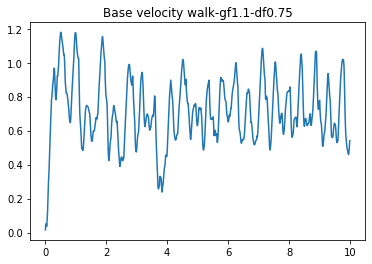

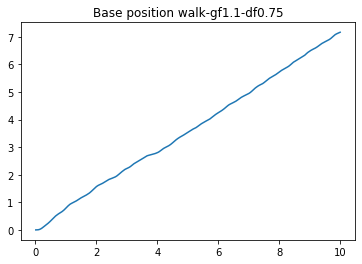

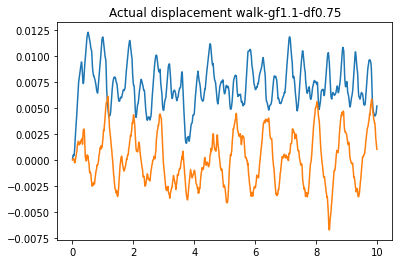

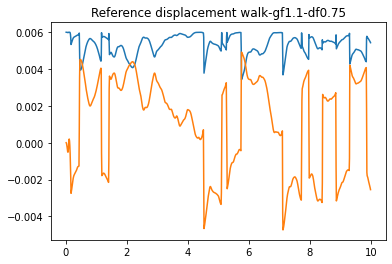

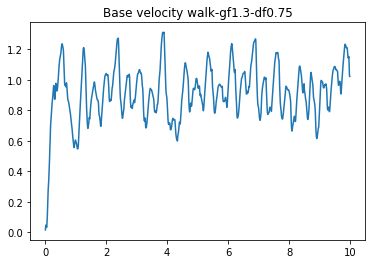

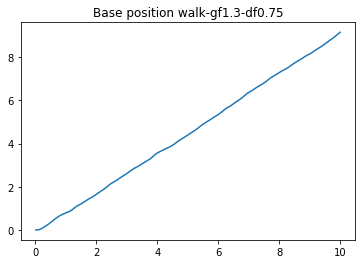

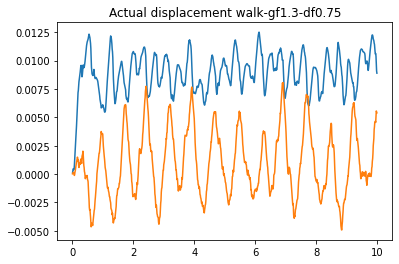

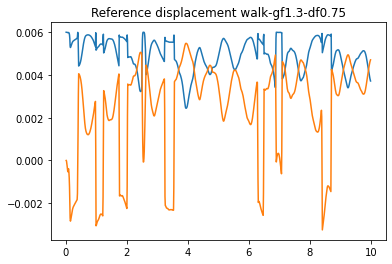

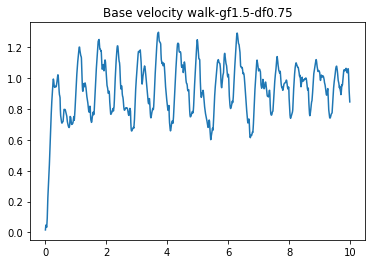

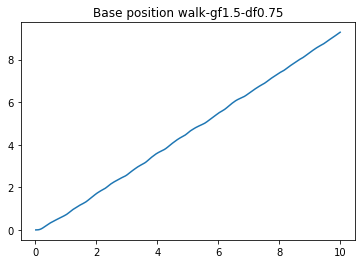

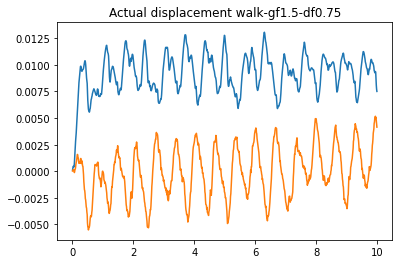

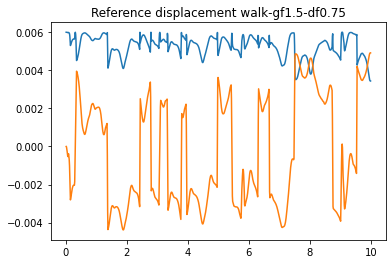

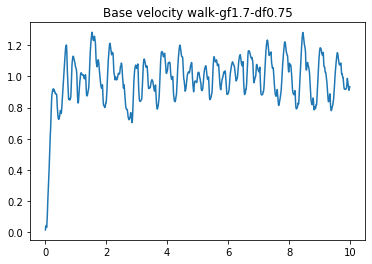

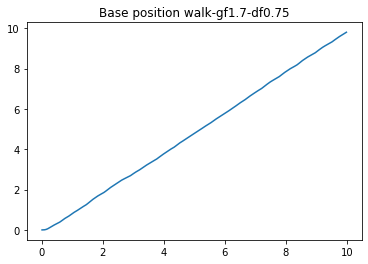

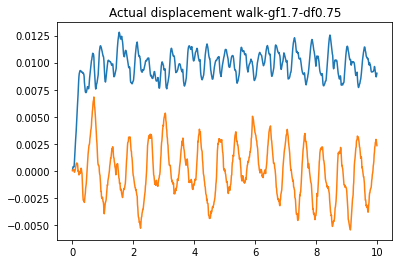

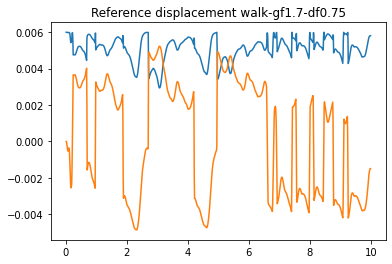

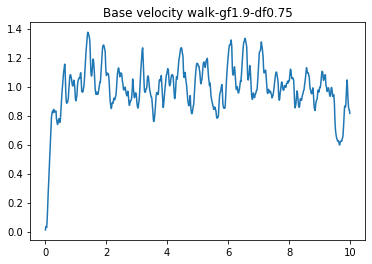

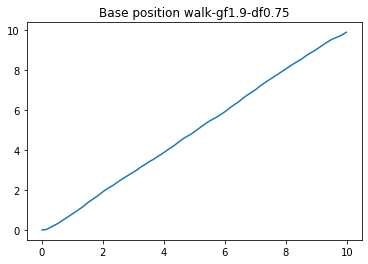

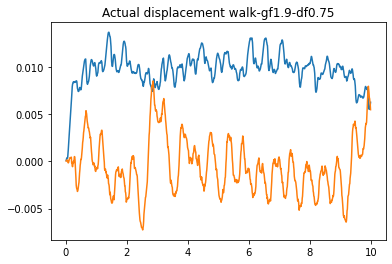

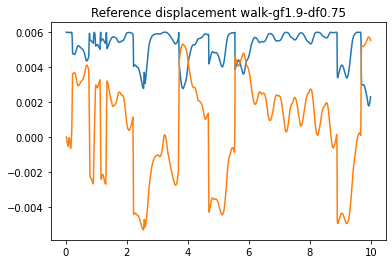

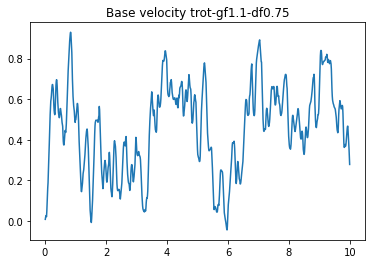

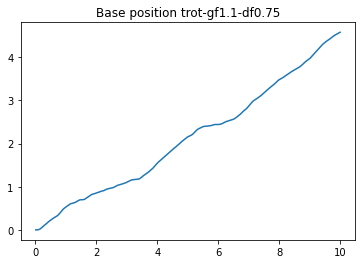

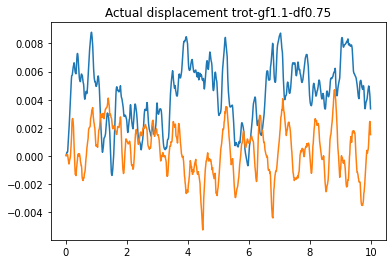

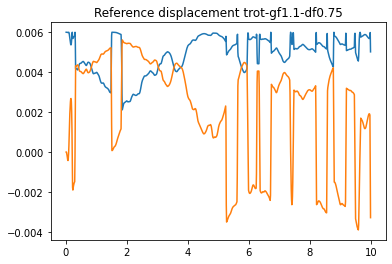

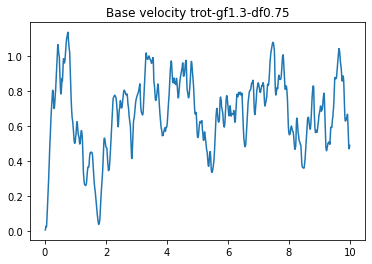

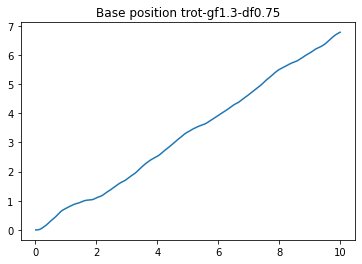

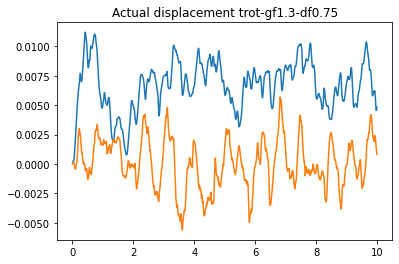

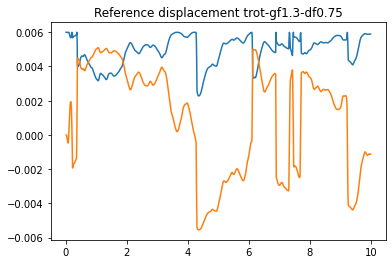

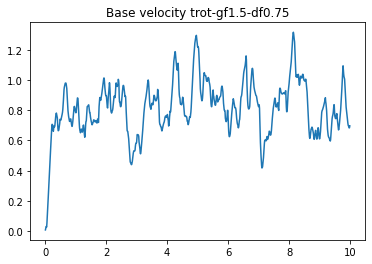

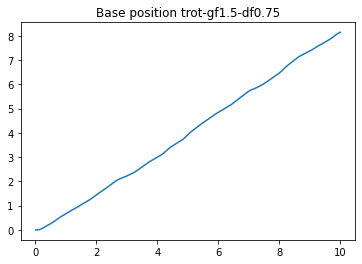

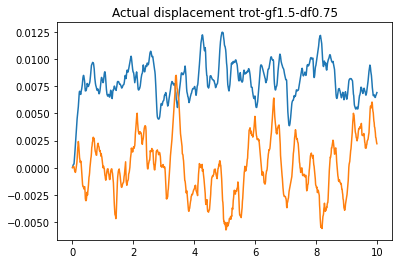

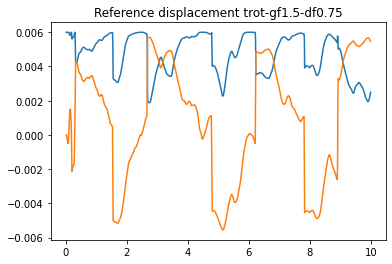

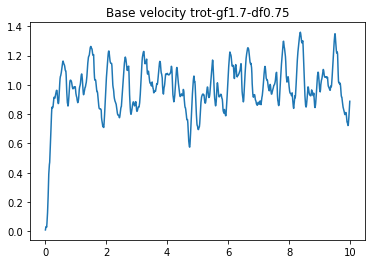

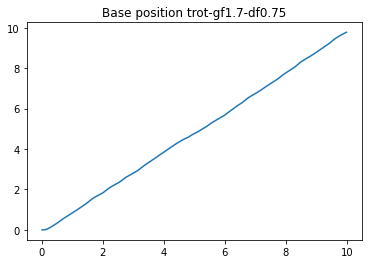

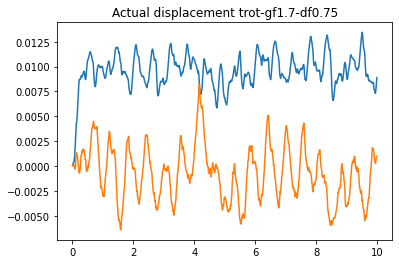

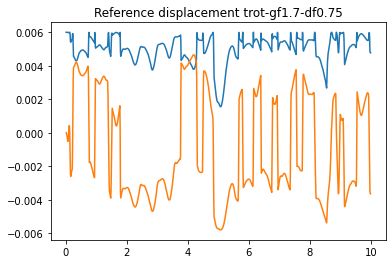

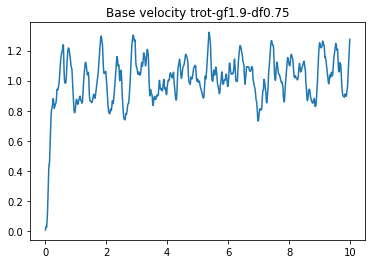

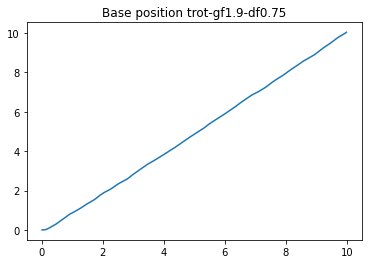

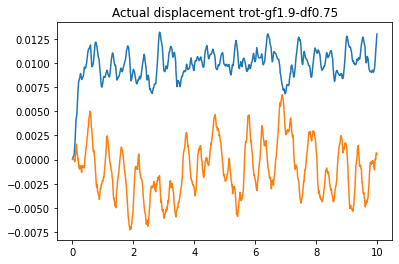

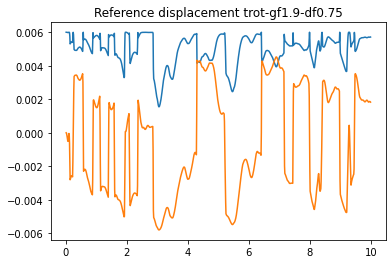

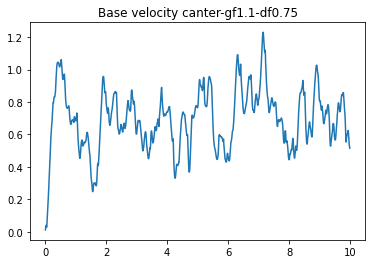

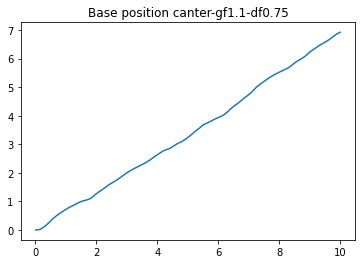

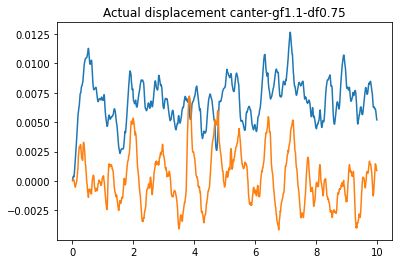

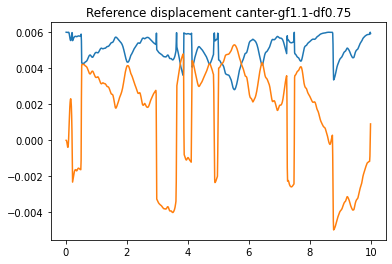

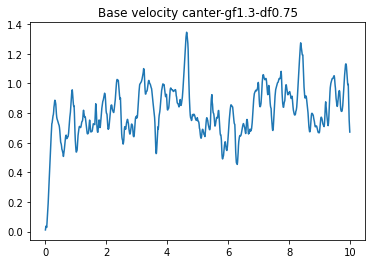

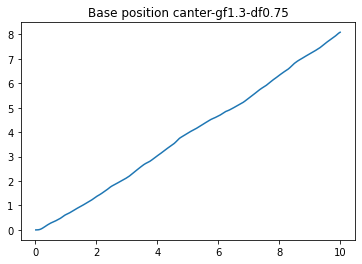

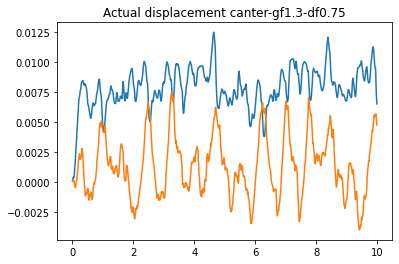

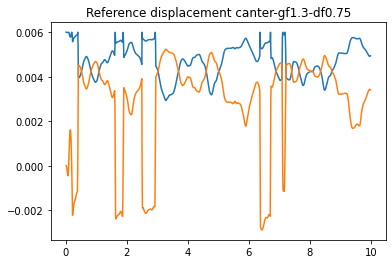

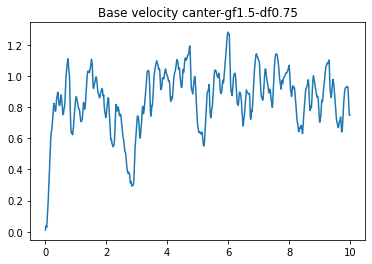

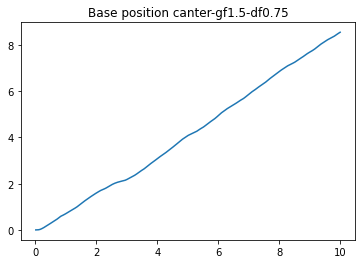

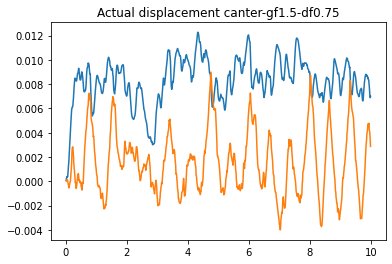

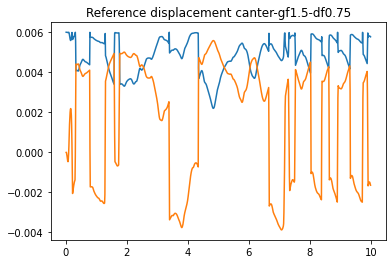

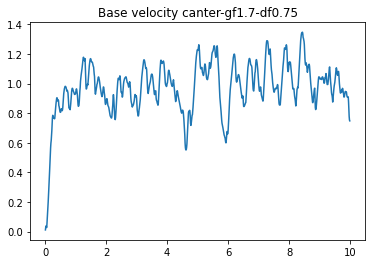

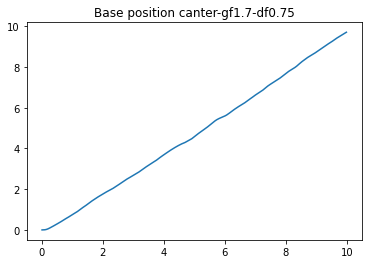

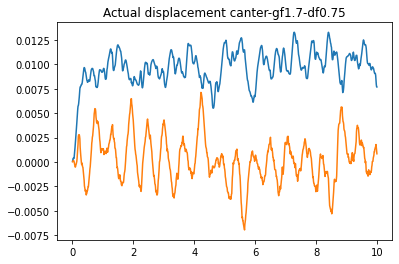

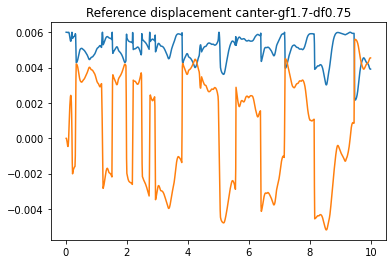

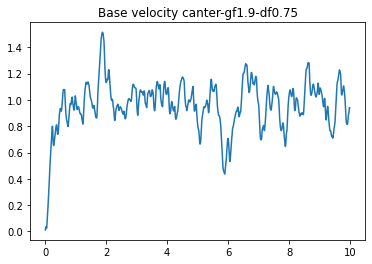

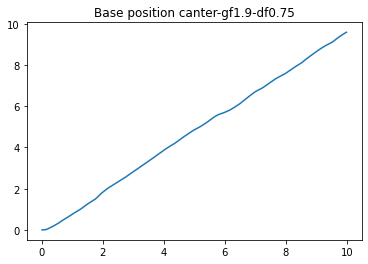

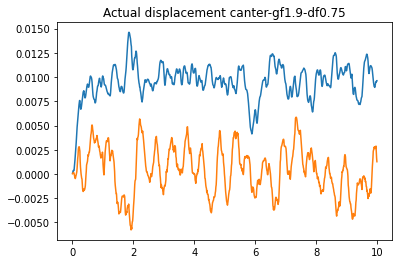

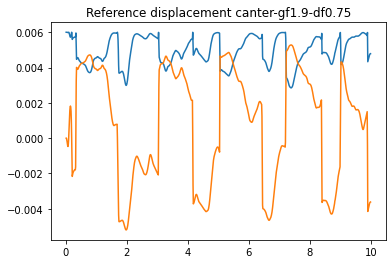

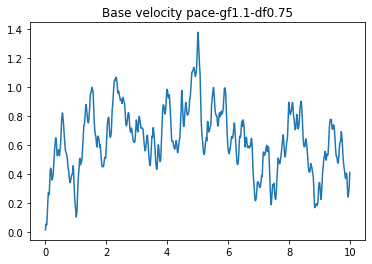

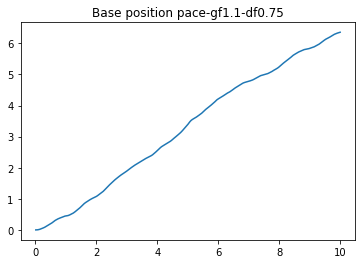

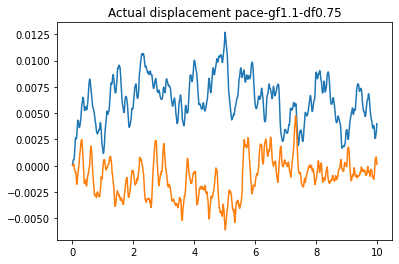

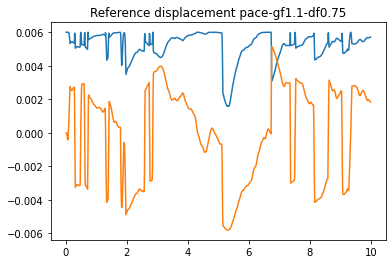

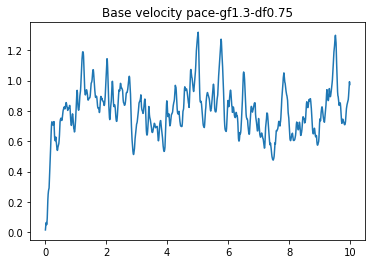

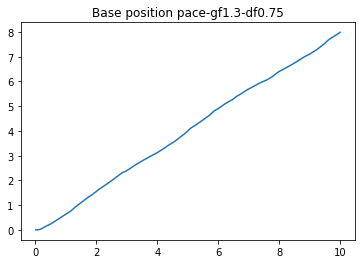

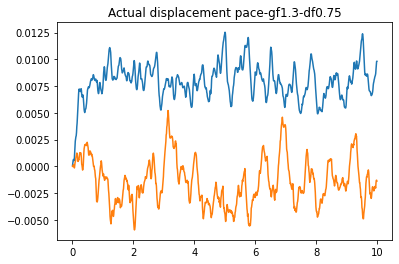

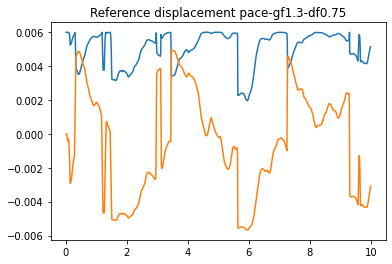

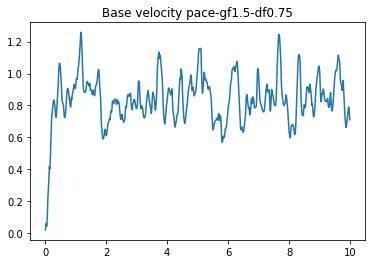

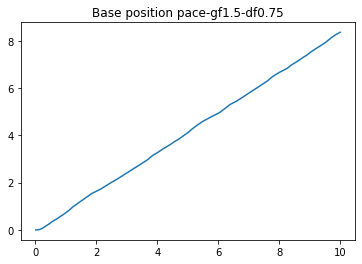

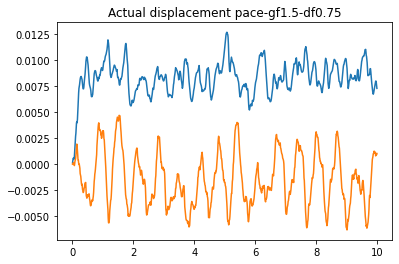

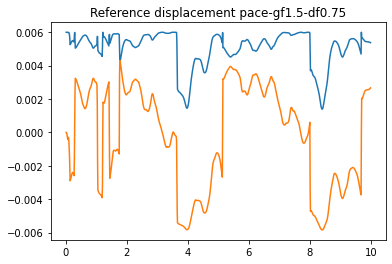

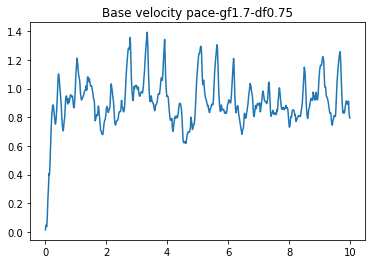

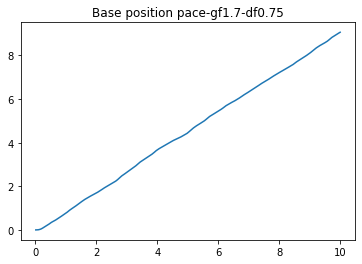

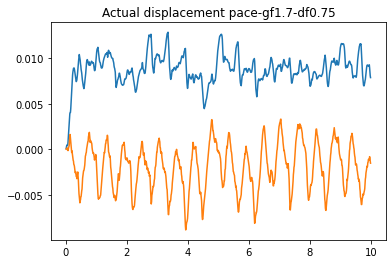

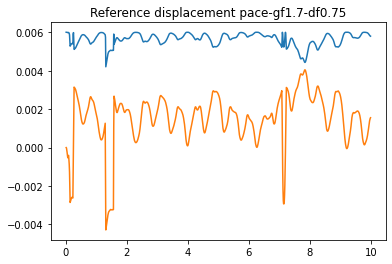

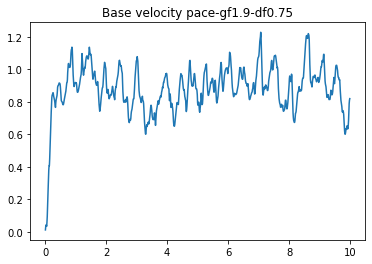

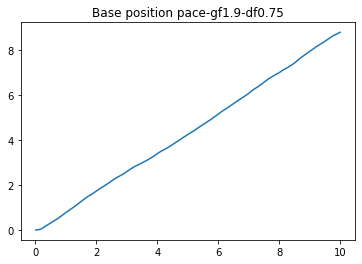

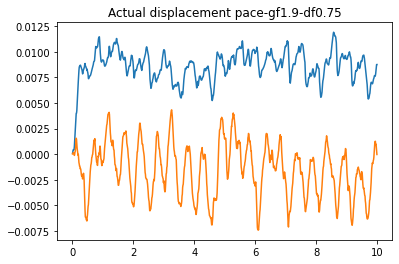

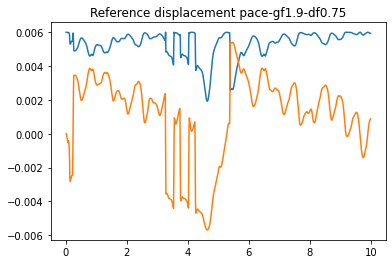

In [18]:
import matplotlib.pyplot as plt

def plot_position_velocity(stats, stats_dir):
    time = stats['time']
    base_vel = stats['base_vel']
    base_pos = stats['base_pos']

    plt.figure()
    plt.title(f"Base velocity {stats_dir.name}")
    plt.plot(time[:-1], base_vel[:-1, 0])
    
    plt.figure()
    plt.title(f"Base position {stats_dir.name}")
    plt.plot(time[:-1], base_pos[:-1, 0])

def plot_actual_reference_displacement(stats, stats_dir):
    time = stats['time']
    ref_disp = stats['ref_displacement']
    act_disp = stats['act_displacement']

    plt.figure()
    plt.title(f"Actual displacement {stats_dir.name}")
    plt.plot(time[:-1], act_disp[:-1])

    plt.figure()
    plt.title(f"Reference displacement {stats_dir.name}")
    plt.plot(time[:-1], ref_disp[:-1])

for stats, stats_dir in zip(statss, stats_dirs):
    plot_position_velocity(stats, stats_dir)
    plot_actual_reference_displacement(stats, stats_dir)

dot_pdt walk-gf1.1-df0.75 0
dot_pdt walk-gf1.1-df0.75 1
dot_pdt walk-gf1.1-df0.75 2
dot_pdt walk-gf1.1-df0.75 3
dot_pdt walk-gf1.3-df0.75 0
dot_pdt walk-gf1.3-df0.75 1
dot_pdt walk-gf1.3-df0.75 2
dot_pdt walk-gf1.3-df0.75 3
dot_pdt walk-gf1.5-df0.75 0
dot_pdt walk-gf1.5-df0.75 1
dot_pdt walk-gf1.5-df0.75 2
dot_pdt walk-gf1.5-df0.75 3
dot_pdt walk-gf1.7-df0.75 0
dot_pdt walk-gf1.7-df0.75 1
dot_pdt walk-gf1.7-df0.75 2
dot_pdt walk-gf1.7-df0.75 3
dot_pdt walk-gf1.9-df0.75 0
dot_pdt walk-gf1.9-df0.75 1
dot_pdt walk-gf1.9-df0.75 2
dot_pdt walk-gf1.9-df0.75 3
dot_pdt trot-gf1.1-df0.75 0
dot_pdt trot-gf1.1-df0.75 1
dot_pdt trot-gf1.1-df0.75 2
dot_pdt trot-gf1.1-df0.75 3
dot_pdt trot-gf1.3-df0.75 0
dot_pdt trot-gf1.3-df0.75 1
dot_pdt trot-gf1.3-df0.75 2
dot_pdt trot-gf1.3-df0.75 3
dot_pdt trot-gf1.5-df0.75 0
dot_pdt trot-gf1.5-df0.75 1
dot_pdt trot-gf1.5-df0.75 2
dot_pdt trot-gf1.5-df0.75 3
dot_pdt trot-gf1.7-df0.75 0
dot_pdt trot-gf1.7-df0.75 1
dot_pdt trot-gf1.7-df0.75 2
dot_pdt trot-gf1.7-d

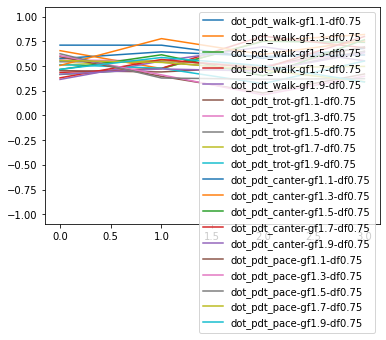

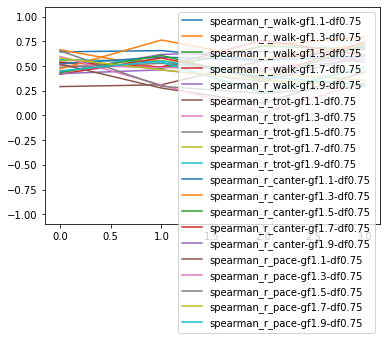

In [19]:
from scipy.stats import spearmanr

metrics = {
    "dot_pdt": lambda x, y: x.dot(y) / np.linalg.norm(x) / np.linalg.norm(y),
    "spearman_r": lambda x, y: spearmanr(x, y)[0]
}

for name, metric in metrics.items():
    plt.figure()
    plt.ylim(-1.1, 1.1)
    for stats, stats_dir in zip(statss, stats_dirs):
        time = stats['time']
        ref_fc = stats['ref_foot_contacts']
        act_fc = stats['act_foot_contacts']
        m = np.zeros(4)
        for i in range(4):
            print(name, stats_dir.name, i)
            m[i] = metric(ref_fc[:,i], act_fc[:,i])
        plt.plot(np.arange(4), m, label = f"{name}_{stats_dir.name}")
    plt.legend()

Total reward for distance: 1757.1725299918648
Total reward for shake: -200.1177466252699
Total reward for imitation: 1657.8000000000002
Total reward for distance: 1925.0497001506662
Total reward for shake: -237.87654804449562
Total reward for imitation: 1664.9499999999998
Total reward for distance: 1952.2723964354977
Total reward for shake: -275.1419952842066
Total reward for imitation: 1583.0500000000002
Total reward for distance: 1963.9917213804335
Total reward for shake: -283.88538735706527
Total reward for imitation: 1588.45
Total reward for distance: 1956.94107628738
Total reward for shake: -228.4258776731807
Total reward for imitation: 1529.3
Total reward for distance: 1290.9775885551576
Total reward for shake: -185.91525305764208
Total reward for imitation: 1510.0500000000002
Total reward for distance: 1704.6323954530524
Total reward for shake: -190.7364237246137
Total reward for imitation: 1553.5
Total reward for distance: 1862.5368416884473
Total reward for shake: -191.9041235

/tmp/ipykernel_40933/1300188432.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Total reward for imitation: 1535.1499999999999
Total reward for distance: 1964.8326633963118
Total reward for shake: -218.06005101146673
Total reward for imitation: 1501.6
Total reward for distance: 1974.8537639062242
Total reward for shake: -204.9787923453313
Total reward for imitation: 1455.25
Total reward for distance: 1749.3283373053778
Total reward for shake: -214.5348057433578
Total reward for imitation: 1596.25
Total reward for distance: 1884.9933864934465
Total reward for shake: -222.56993055582348
Total reward for imitation: 1651.05
Total reward for distance: 1893.7388537909287
Total reward for shake: -268.07109015139974
Total reward for imitation: 1551.9
Total reward for distance: 1964.6607355135243
Total reward for shake: -243.85639873236272
Total reward for imitation: 1544.6
Total reward for distance: 1949.200097279749
Total reward for shake: -207.67597655534632
Total reward for imitation: 1481.25
Total reward for distance: 1621.8318078324478
Total reward for shake: -139.32

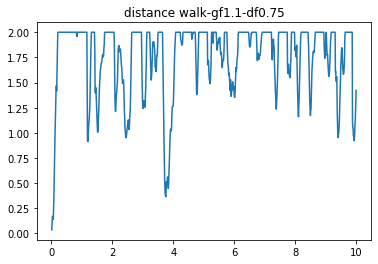

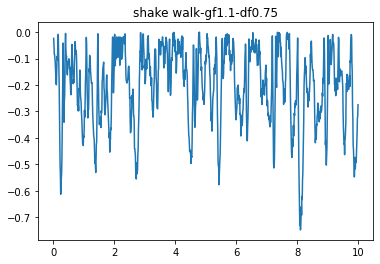

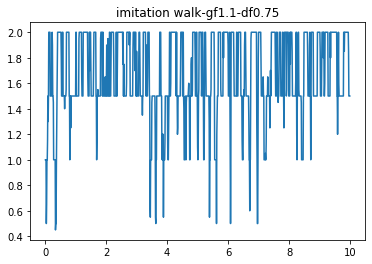

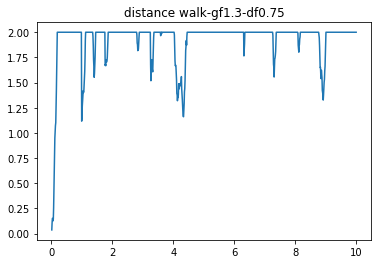

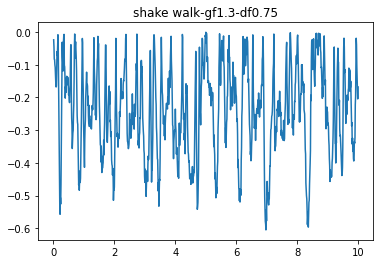

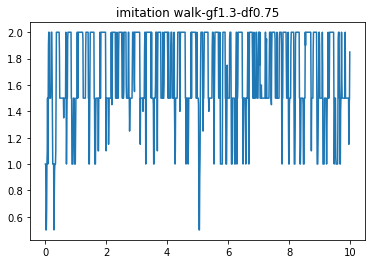

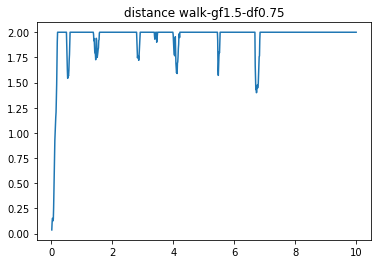

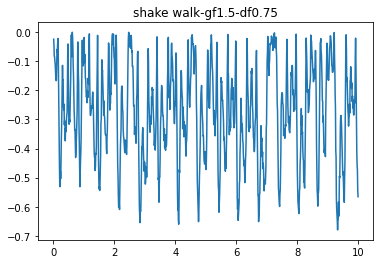

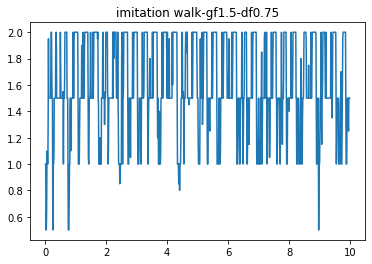

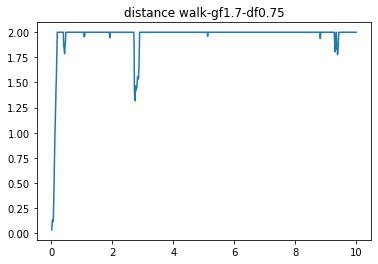

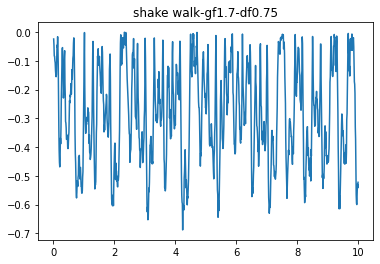

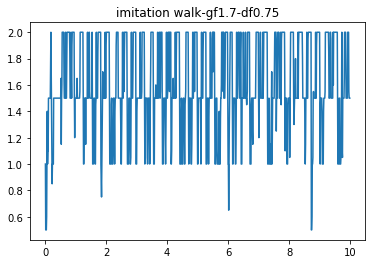

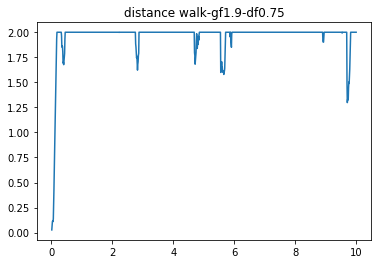

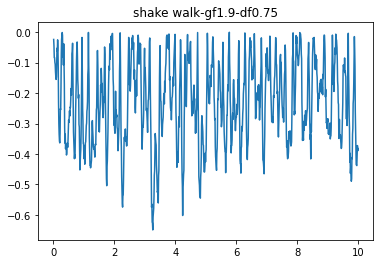

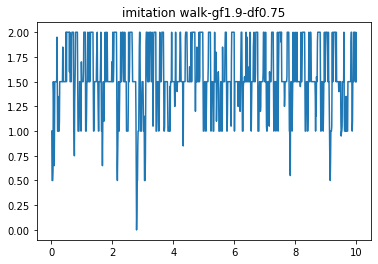

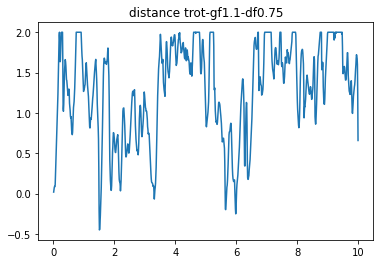

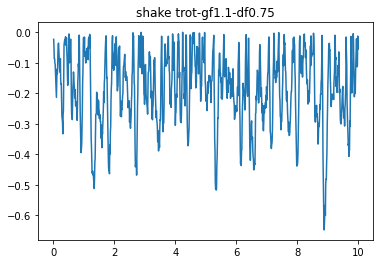

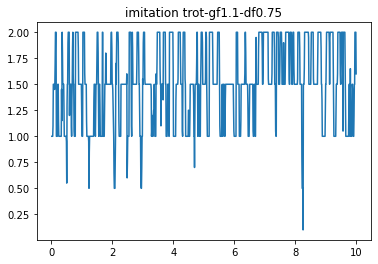

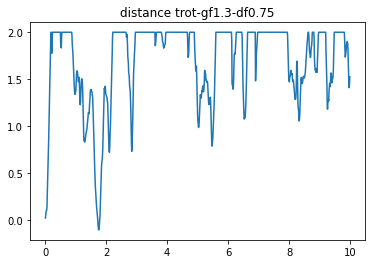

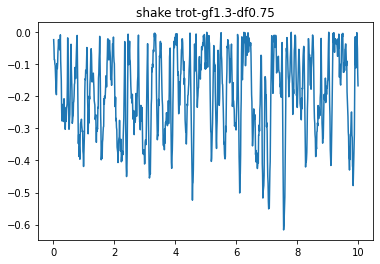

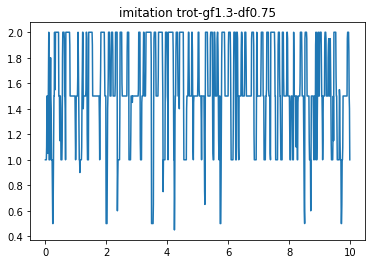

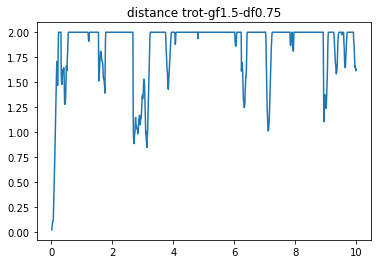

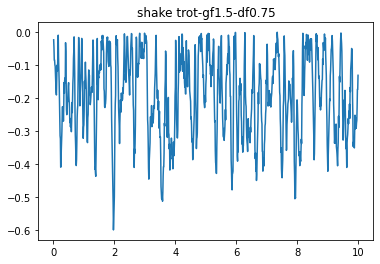

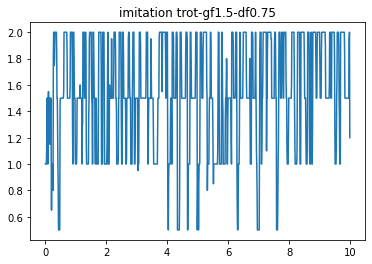

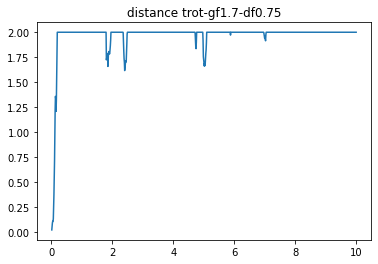

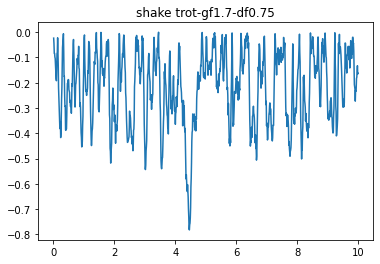

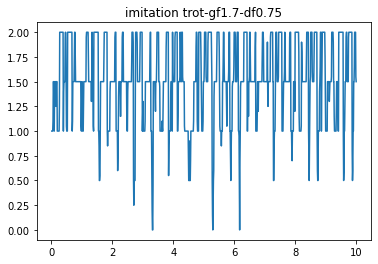

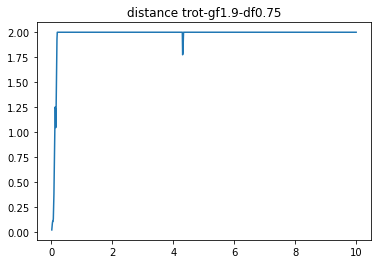

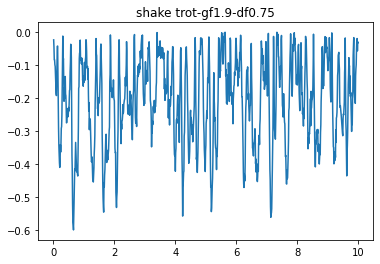

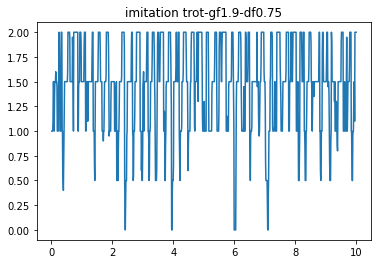

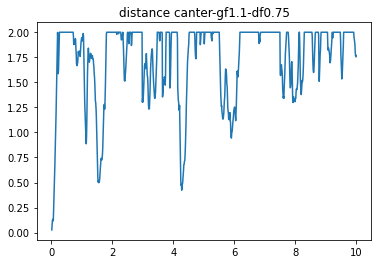

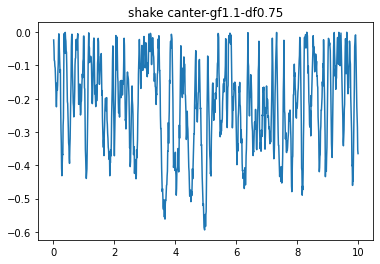

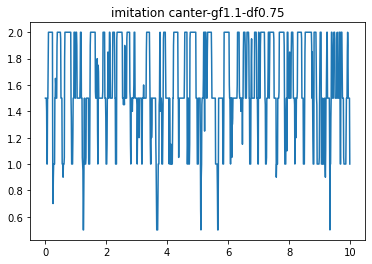

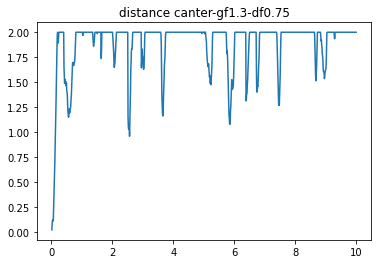

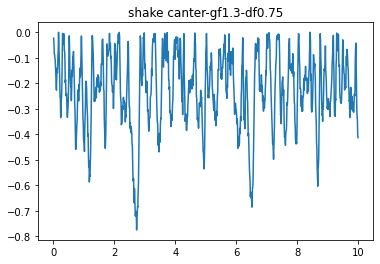

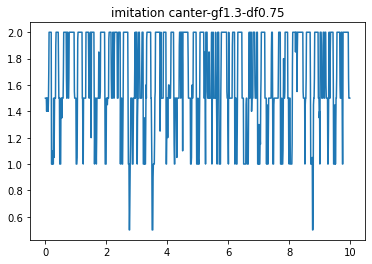

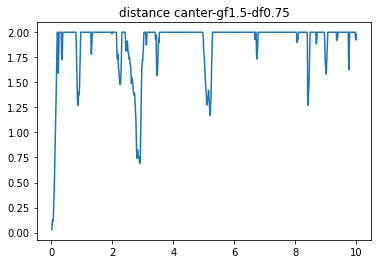

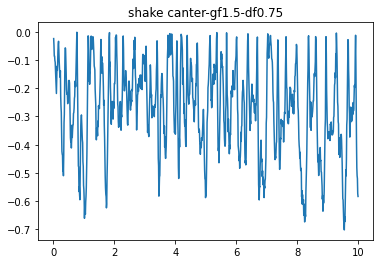

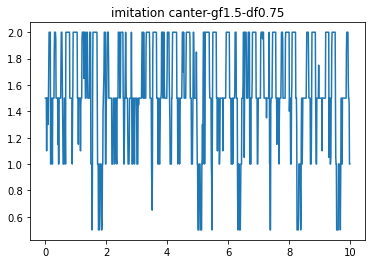

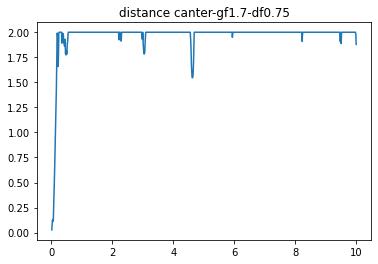

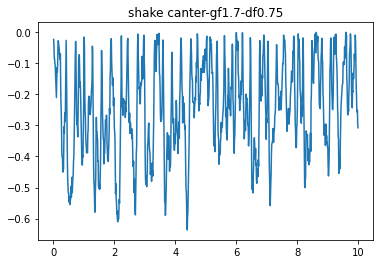

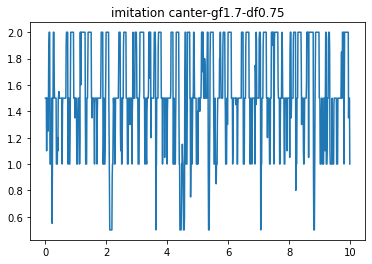

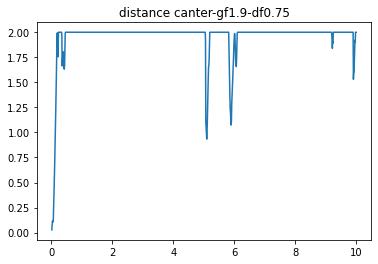

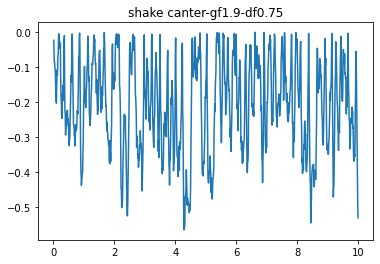

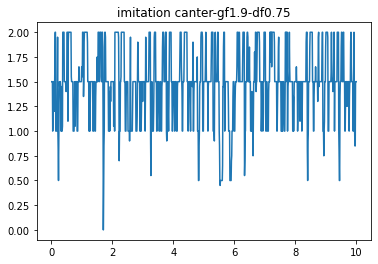

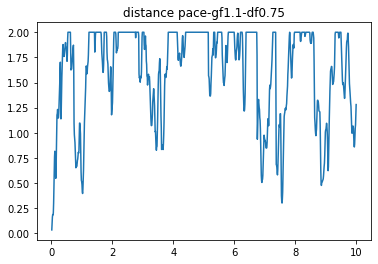

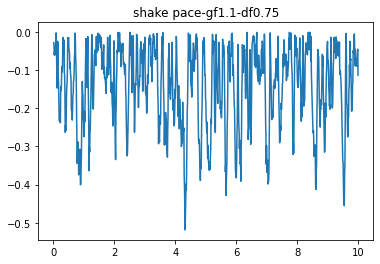

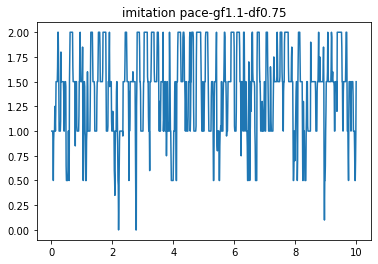

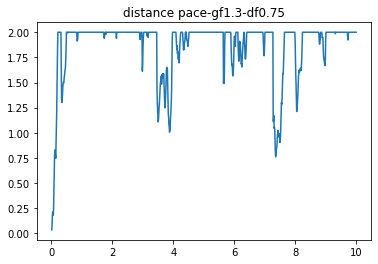

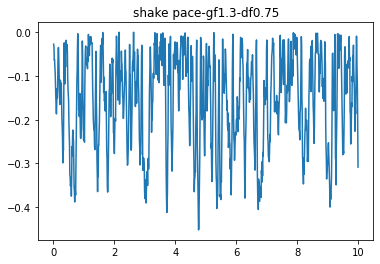

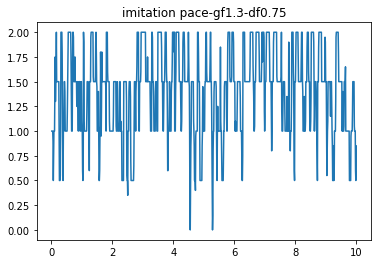

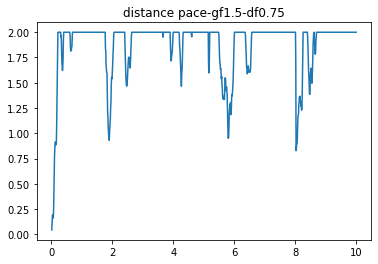

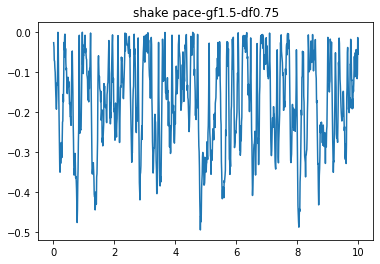

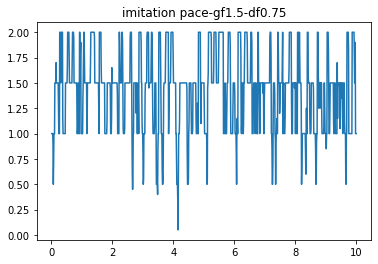

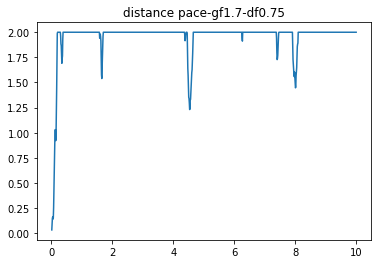

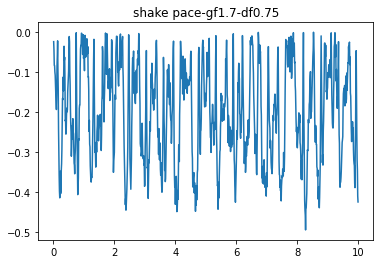

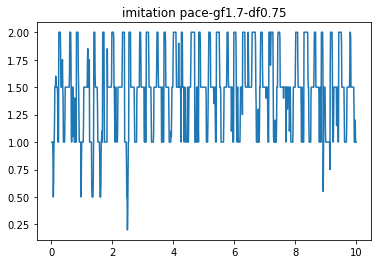

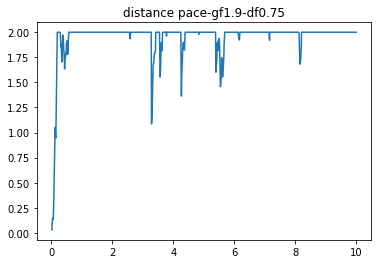

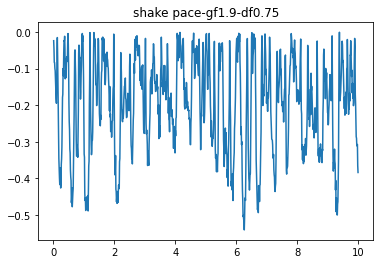

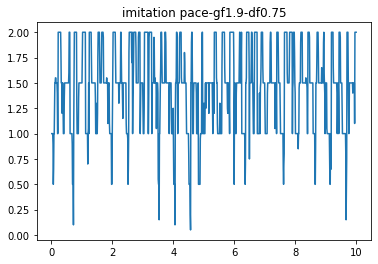

In [20]:
def plot_reward_components(stats, stats_dir):
    time = stats['time']
    reward_components_values = stats['reward_component_values']
    reward_components_names = stats['reward_component_names']

    for i, rew_comp_name in enumerate(reward_components_names):
        plt.figure()
        plt.title(f"{rew_comp_name} {stats_dir.name}")
        plt.plot(time[:-1], reward_components_values[:-1,i])

        print(f"Total reward for {rew_comp_name}: {reward_components_values[:-1,i].sum()}")

for stats, stats_dir in zip(statss, stats_dirs):
    plot_reward_components(stats, stats_dir)